<a href="https://colab.research.google.com/github/nyanta012/stockmarket/blob/main/ChatGPT%E3%83%88%E3%83%AC%E3%83%BC%E3%83%89%E6%88%A6%E7%95%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
"""
・実行は各セル毎にShift + Enterを押す
・Google colaboでは、(US拠点のため)BinanceAPIが使用できないためjson形式のデータを読み込むように変更
"""

'\n・実行は各セル毎にShift + Enterを押す\n・Google colaboでは、(US拠点のため)BinanceAPIが使用できないためjson形式のデータを読み込むように変更\n'

In [24]:
import pandas as pd

In [25]:
#@title
def read_from_json():
  json_data = {"timestamp":{"0":"2020-01-01","1":"2020-01-02","2":"2020-01-03","3":"2020-01-04","4":"2020-01-05","5":"2020-01-06","6":"2020-01-07","7":"2020-01-08","8":"2020-01-09","9":"2020-01-10","10":"2020-01-11","11":"2020-01-12","12":"2020-01-13","13":"2020-01-14","14":"2020-01-15","15":"2020-01-16","16":"2020-01-17","17":"2020-01-18","18":"2020-01-19","19":"2020-01-20","20":"2020-01-21","21":"2020-01-22","22":"2020-01-23","23":"2020-01-24","24":"2020-01-25","25":"2020-01-26","26":"2020-01-27","27":"2020-01-28","28":"2020-01-29","29":"2020-01-30","30":"2020-01-31","31":"2020-02-01","32":"2020-02-02","33":"2020-02-03","34":"2020-02-04","35":"2020-02-05","36":"2020-02-06","37":"2020-02-07","38":"2020-02-08","39":"2020-02-09","40":"2020-02-10","41":"2020-02-11","42":"2020-02-12","43":"2020-02-13","44":"2020-02-14","45":"2020-02-15","46":"2020-02-16","47":"2020-02-17","48":"2020-02-18","49":"2020-02-19","50":"2020-02-20","51":"2020-02-21","52":"2020-02-22","53":"2020-02-23","54":"2020-02-24","55":"2020-02-25","56":"2020-02-26","57":"2020-02-27","58":"2020-02-28","59":"2020-02-29","60":"2020-03-01","61":"2020-03-02","62":"2020-03-03","63":"2020-03-04","64":"2020-03-05","65":"2020-03-06","66":"2020-03-07","67":"2020-03-08","68":"2020-03-09","69":"2020-03-10","70":"2020-03-11","71":"2020-03-12","72":"2020-03-13","73":"2020-03-14","74":"2020-03-15","75":"2020-03-16","76":"2020-03-17","77":"2020-03-18","78":"2020-03-19","79":"2020-03-20","80":"2020-03-21","81":"2020-03-22","82":"2020-03-23","83":"2020-03-24","84":"2020-03-25","85":"2020-03-26","86":"2020-03-27","87":"2020-03-28","88":"2020-03-29","89":"2020-03-30","90":"2020-03-31","91":"2020-04-01","92":"2020-04-02","93":"2020-04-03","94":"2020-04-04","95":"2020-04-05","96":"2020-04-06","97":"2020-04-07","98":"2020-04-08","99":"2020-04-09","100":"2020-04-10","101":"2020-04-11","102":"2020-04-12","103":"2020-04-13","104":"2020-04-14","105":"2020-04-15","106":"2020-04-16","107":"2020-04-17","108":"2020-04-18","109":"2020-04-19","110":"2020-04-20","111":"2020-04-21","112":"2020-04-22","113":"2020-04-23","114":"2020-04-24","115":"2020-04-25","116":"2020-04-26","117":"2020-04-27","118":"2020-04-28","119":"2020-04-29","120":"2020-04-30","121":"2020-05-01","122":"2020-05-02","123":"2020-05-03","124":"2020-05-04","125":"2020-05-05","126":"2020-05-06","127":"2020-05-07","128":"2020-05-08","129":"2020-05-09","130":"2020-05-10","131":"2020-05-11","132":"2020-05-12","133":"2020-05-13","134":"2020-05-14","135":"2020-05-15","136":"2020-05-16","137":"2020-05-17","138":"2020-05-18","139":"2020-05-19","140":"2020-05-20","141":"2020-05-21","142":"2020-05-22","143":"2020-05-23","144":"2020-05-24","145":"2020-05-25","146":"2020-05-26","147":"2020-05-27","148":"2020-05-28","149":"2020-05-29","150":"2020-05-30","151":"2020-05-31","152":"2020-06-01","153":"2020-06-02","154":"2020-06-03","155":"2020-06-04","156":"2020-06-05","157":"2020-06-06","158":"2020-06-07","159":"2020-06-08","160":"2020-06-09","161":"2020-06-10","162":"2020-06-11","163":"2020-06-12","164":"2020-06-13","165":"2020-06-14","166":"2020-06-15","167":"2020-06-16","168":"2020-06-17","169":"2020-06-18","170":"2020-06-19","171":"2020-06-20","172":"2020-06-21","173":"2020-06-22","174":"2020-06-23","175":"2020-06-24","176":"2020-06-25","177":"2020-06-26","178":"2020-06-27","179":"2020-06-28","180":"2020-06-29","181":"2020-06-30","182":"2020-07-01","183":"2020-07-02","184":"2020-07-03","185":"2020-07-04","186":"2020-07-05","187":"2020-07-06","188":"2020-07-07","189":"2020-07-08","190":"2020-07-09","191":"2020-07-10","192":"2020-07-11","193":"2020-07-12","194":"2020-07-13","195":"2020-07-14","196":"2020-07-15","197":"2020-07-16","198":"2020-07-17","199":"2020-07-18","200":"2020-07-19","201":"2020-07-20","202":"2020-07-21","203":"2020-07-22","204":"2020-07-23","205":"2020-07-24","206":"2020-07-25","207":"2020-07-26","208":"2020-07-27","209":"2020-07-28","210":"2020-07-29","211":"2020-07-30","212":"2020-07-31","213":"2020-08-01","214":"2020-08-02","215":"2020-08-03","216":"2020-08-04","217":"2020-08-05","218":"2020-08-06","219":"2020-08-07","220":"2020-08-08","221":"2020-08-09","222":"2020-08-10","223":"2020-08-11","224":"2020-08-12","225":"2020-08-13","226":"2020-08-14","227":"2020-08-15","228":"2020-08-16","229":"2020-08-17","230":"2020-08-18","231":"2020-08-19","232":"2020-08-20","233":"2020-08-21","234":"2020-08-22","235":"2020-08-23","236":"2020-08-24","237":"2020-08-25","238":"2020-08-26","239":"2020-08-27","240":"2020-08-28","241":"2020-08-29","242":"2020-08-30","243":"2020-08-31","244":"2020-09-01","245":"2020-09-02","246":"2020-09-03","247":"2020-09-04","248":"2020-09-05","249":"2020-09-06","250":"2020-09-07","251":"2020-09-08","252":"2020-09-09","253":"2020-09-10","254":"2020-09-11","255":"2020-09-12","256":"2020-09-13","257":"2020-09-14","258":"2020-09-15","259":"2020-09-16","260":"2020-09-17","261":"2020-09-18","262":"2020-09-19","263":"2020-09-20","264":"2020-09-21","265":"2020-09-22","266":"2020-09-23","267":"2020-09-24","268":"2020-09-25","269":"2020-09-26","270":"2020-09-27","271":"2020-09-28","272":"2020-09-29","273":"2020-09-30","274":"2020-10-01","275":"2020-10-02","276":"2020-10-03","277":"2020-10-04","278":"2020-10-05","279":"2020-10-06","280":"2020-10-07","281":"2020-10-08","282":"2020-10-09","283":"2020-10-10","284":"2020-10-11","285":"2020-10-12","286":"2020-10-13","287":"2020-10-14","288":"2020-10-15","289":"2020-10-16","290":"2020-10-17","291":"2020-10-18","292":"2020-10-19","293":"2020-10-20","294":"2020-10-21","295":"2020-10-22","296":"2020-10-23","297":"2020-10-24","298":"2020-10-25","299":"2020-10-26","300":"2020-10-27","301":"2020-10-28","302":"2020-10-29","303":"2020-10-30","304":"2020-10-31","305":"2020-11-01","306":"2020-11-02","307":"2020-11-03","308":"2020-11-04","309":"2020-11-05","310":"2020-11-06","311":"2020-11-07","312":"2020-11-08","313":"2020-11-09","314":"2020-11-10","315":"2020-11-11","316":"2020-11-12","317":"2020-11-13","318":"2020-11-14","319":"2020-11-15","320":"2020-11-16","321":"2020-11-17","322":"2020-11-18","323":"2020-11-19","324":"2020-11-20","325":"2020-11-21","326":"2020-11-22","327":"2020-11-23","328":"2020-11-24","329":"2020-11-25","330":"2020-11-26","331":"2020-11-27","332":"2020-11-28","333":"2020-11-29","334":"2020-11-30","335":"2020-12-01","336":"2020-12-02","337":"2020-12-03","338":"2020-12-04","339":"2020-12-05","340":"2020-12-06","341":"2020-12-07","342":"2020-12-08","343":"2020-12-09","344":"2020-12-10","345":"2020-12-11","346":"2020-12-12","347":"2020-12-13","348":"2020-12-14","349":"2020-12-15","350":"2020-12-16","351":"2020-12-17","352":"2020-12-18","353":"2020-12-19","354":"2020-12-20","355":"2020-12-21","356":"2020-12-22","357":"2020-12-23","358":"2020-12-24","359":"2020-12-25","360":"2020-12-26","361":"2020-12-27","362":"2020-12-28","363":"2020-12-29","364":"2020-12-30","365":"2020-12-31","366":"2021-01-01","367":"2021-01-02","368":"2021-01-03","369":"2021-01-04","370":"2021-01-05","371":"2021-01-06","372":"2021-01-07","373":"2021-01-08","374":"2021-01-09","375":"2021-01-10","376":"2021-01-11","377":"2021-01-12","378":"2021-01-13","379":"2021-01-14","380":"2021-01-15","381":"2021-01-16","382":"2021-01-17","383":"2021-01-18","384":"2021-01-19","385":"2021-01-20","386":"2021-01-21","387":"2021-01-22","388":"2021-01-23","389":"2021-01-24","390":"2021-01-25","391":"2021-01-26","392":"2021-01-27","393":"2021-01-28","394":"2021-01-29","395":"2021-01-30","396":"2021-01-31","397":"2021-02-01","398":"2021-02-02","399":"2021-02-03","400":"2021-02-04","401":"2021-02-05","402":"2021-02-06","403":"2021-02-07","404":"2021-02-08","405":"2021-02-09","406":"2021-02-10","407":"2021-02-11","408":"2021-02-12","409":"2021-02-13","410":"2021-02-14","411":"2021-02-15","412":"2021-02-16","413":"2021-02-17","414":"2021-02-18","415":"2021-02-19","416":"2021-02-20","417":"2021-02-21","418":"2021-02-22","419":"2021-02-23","420":"2021-02-24","421":"2021-02-25","422":"2021-02-26","423":"2021-02-27","424":"2021-02-28","425":"2021-03-01","426":"2021-03-02","427":"2021-03-03","428":"2021-03-04","429":"2021-03-05","430":"2021-03-06","431":"2021-03-07","432":"2021-03-08","433":"2021-03-09","434":"2021-03-10","435":"2021-03-11","436":"2021-03-12","437":"2021-03-13","438":"2021-03-14","439":"2021-03-15","440":"2021-03-16","441":"2021-03-17","442":"2021-03-18","443":"2021-03-19","444":"2021-03-20","445":"2021-03-21","446":"2021-03-22","447":"2021-03-23","448":"2021-03-24","449":"2021-03-25","450":"2021-03-26","451":"2021-03-27","452":"2021-03-28","453":"2021-03-29","454":"2021-03-30","455":"2021-03-31","456":"2021-04-01","457":"2021-04-02","458":"2021-04-03","459":"2021-04-04","460":"2021-04-05","461":"2021-04-06","462":"2021-04-07","463":"2021-04-08","464":"2021-04-09","465":"2021-04-10","466":"2021-04-11","467":"2021-04-12","468":"2021-04-13","469":"2021-04-14","470":"2021-04-15","471":"2021-04-16","472":"2021-04-17","473":"2021-04-18","474":"2021-04-19","475":"2021-04-20","476":"2021-04-21","477":"2021-04-22","478":"2021-04-23","479":"2021-04-24","480":"2021-04-25","481":"2021-04-26","482":"2021-04-27","483":"2021-04-28","484":"2021-04-29","485":"2021-04-30","486":"2021-05-01","487":"2021-05-02","488":"2021-05-03","489":"2021-05-04","490":"2021-05-05","491":"2021-05-06","492":"2021-05-07","493":"2021-05-08","494":"2021-05-09","495":"2021-05-10","496":"2021-05-11","497":"2021-05-12","498":"2021-05-13","499":"2021-05-14","500":"2021-05-15","501":"2021-05-16","502":"2021-05-17","503":"2021-05-18","504":"2021-05-19","505":"2021-05-20","506":"2021-05-21","507":"2021-05-22","508":"2021-05-23","509":"2021-05-24","510":"2021-05-25","511":"2021-05-26","512":"2021-05-27","513":"2021-05-28","514":"2021-05-29","515":"2021-05-30","516":"2021-05-31","517":"2021-06-01","518":"2021-06-02","519":"2021-06-03","520":"2021-06-04","521":"2021-06-05","522":"2021-06-06","523":"2021-06-07","524":"2021-06-08","525":"2021-06-09","526":"2021-06-10","527":"2021-06-11","528":"2021-06-12","529":"2021-06-13","530":"2021-06-14","531":"2021-06-15","532":"2021-06-16","533":"2021-06-17","534":"2021-06-18","535":"2021-06-19","536":"2021-06-20","537":"2021-06-21","538":"2021-06-22","539":"2021-06-23","540":"2021-06-24","541":"2021-06-25","542":"2021-06-26","543":"2021-06-27","544":"2021-06-28","545":"2021-06-29","546":"2021-06-30","547":"2021-07-01","548":"2021-07-02","549":"2021-07-03","550":"2021-07-04","551":"2021-07-05","552":"2021-07-06","553":"2021-07-07","554":"2021-07-08","555":"2021-07-09","556":"2021-07-10","557":"2021-07-11","558":"2021-07-12","559":"2021-07-13","560":"2021-07-14","561":"2021-07-15","562":"2021-07-16","563":"2021-07-17","564":"2021-07-18","565":"2021-07-19","566":"2021-07-20","567":"2021-07-21","568":"2021-07-22","569":"2021-07-23","570":"2021-07-24","571":"2021-07-25","572":"2021-07-26","573":"2021-07-27","574":"2021-07-28","575":"2021-07-29","576":"2021-07-30","577":"2021-07-31","578":"2021-08-01","579":"2021-08-02","580":"2021-08-03","581":"2021-08-04","582":"2021-08-05","583":"2021-08-06","584":"2021-08-07","585":"2021-08-08","586":"2021-08-09","587":"2021-08-10","588":"2021-08-11","589":"2021-08-12","590":"2021-08-13","591":"2021-08-14","592":"2021-08-15","593":"2021-08-16","594":"2021-08-17","595":"2021-08-18","596":"2021-08-19","597":"2021-08-20","598":"2021-08-21","599":"2021-08-22","600":"2021-08-23","601":"2021-08-24","602":"2021-08-25","603":"2021-08-26","604":"2021-08-27","605":"2021-08-28","606":"2021-08-29","607":"2021-08-30","608":"2021-08-31","609":"2021-09-01","610":"2021-09-02","611":"2021-09-03","612":"2021-09-04","613":"2021-09-05","614":"2021-09-06","615":"2021-09-07","616":"2021-09-08","617":"2021-09-09","618":"2021-09-10","619":"2021-09-11","620":"2021-09-12","621":"2021-09-13","622":"2021-09-14","623":"2021-09-15","624":"2021-09-16","625":"2021-09-17","626":"2021-09-18","627":"2021-09-19","628":"2021-09-20","629":"2021-09-21","630":"2021-09-22","631":"2021-09-23","632":"2021-09-24","633":"2021-09-25","634":"2021-09-26","635":"2021-09-27","636":"2021-09-28","637":"2021-09-29","638":"2021-09-30","639":"2021-10-01","640":"2021-10-02","641":"2021-10-03","642":"2021-10-04","643":"2021-10-05","644":"2021-10-06","645":"2021-10-07","646":"2021-10-08","647":"2021-10-09","648":"2021-10-10","649":"2021-10-11","650":"2021-10-12","651":"2021-10-13","652":"2021-10-14","653":"2021-10-15","654":"2021-10-16","655":"2021-10-17","656":"2021-10-18","657":"2021-10-19","658":"2021-10-20","659":"2021-10-21","660":"2021-10-22","661":"2021-10-23","662":"2021-10-24","663":"2021-10-25","664":"2021-10-26","665":"2021-10-27","666":"2021-10-28","667":"2021-10-29","668":"2021-10-30","669":"2021-10-31","670":"2021-11-01","671":"2021-11-02","672":"2021-11-03","673":"2021-11-04","674":"2021-11-05","675":"2021-11-06","676":"2021-11-07","677":"2021-11-08","678":"2021-11-09","679":"2021-11-10","680":"2021-11-11","681":"2021-11-12","682":"2021-11-13","683":"2021-11-14","684":"2021-11-15","685":"2021-11-16","686":"2021-11-17","687":"2021-11-18","688":"2021-11-19","689":"2021-11-20","690":"2021-11-21","691":"2021-11-22","692":"2021-11-23","693":"2021-11-24","694":"2021-11-25","695":"2021-11-26","696":"2021-11-27","697":"2021-11-28","698":"2021-11-29","699":"2021-11-30","700":"2021-12-01","701":"2021-12-02","702":"2021-12-03","703":"2021-12-04","704":"2021-12-05","705":"2021-12-06","706":"2021-12-07","707":"2021-12-08","708":"2021-12-09","709":"2021-12-10","710":"2021-12-11","711":"2021-12-12","712":"2021-12-13","713":"2021-12-14","714":"2021-12-15","715":"2021-12-16","716":"2021-12-17","717":"2021-12-18","718":"2021-12-19","719":"2021-12-20","720":"2021-12-21","721":"2021-12-22","722":"2021-12-23","723":"2021-12-24","724":"2021-12-25","725":"2021-12-26","726":"2021-12-27","727":"2021-12-28","728":"2021-12-29","729":"2021-12-30","730":"2021-12-31","731":"2022-01-01","732":"2022-01-02","733":"2022-01-03","734":"2022-01-04","735":"2022-01-05","736":"2022-01-06","737":"2022-01-07","738":"2022-01-08","739":"2022-01-09","740":"2022-01-10","741":"2022-01-11","742":"2022-01-12","743":"2022-01-13","744":"2022-01-14","745":"2022-01-15","746":"2022-01-16","747":"2022-01-17","748":"2022-01-18","749":"2022-01-19","750":"2022-01-20","751":"2022-01-21","752":"2022-01-22","753":"2022-01-23","754":"2022-01-24","755":"2022-01-25","756":"2022-01-26","757":"2022-01-27","758":"2022-01-28","759":"2022-01-29","760":"2022-01-30","761":"2022-01-31","762":"2022-02-01","763":"2022-02-02","764":"2022-02-03","765":"2022-02-04","766":"2022-02-05","767":"2022-02-06","768":"2022-02-07","769":"2022-02-08","770":"2022-02-09","771":"2022-02-10","772":"2022-02-11","773":"2022-02-12","774":"2022-02-13","775":"2022-02-14","776":"2022-02-15","777":"2022-02-16","778":"2022-02-17","779":"2022-02-18","780":"2022-02-19","781":"2022-02-20","782":"2022-02-21","783":"2022-02-22","784":"2022-02-23","785":"2022-02-24","786":"2022-02-25","787":"2022-02-26","788":"2022-02-27","789":"2022-02-28","790":"2022-03-01","791":"2022-03-02","792":"2022-03-03","793":"2022-03-04","794":"2022-03-05","795":"2022-03-06","796":"2022-03-07","797":"2022-03-08","798":"2022-03-09","799":"2022-03-10","800":"2022-03-11","801":"2022-03-12","802":"2022-03-13","803":"2022-03-14","804":"2022-03-15","805":"2022-03-16","806":"2022-03-17","807":"2022-03-18","808":"2022-03-19","809":"2022-03-20","810":"2022-03-21","811":"2022-03-22","812":"2022-03-23","813":"2022-03-24","814":"2022-03-25","815":"2022-03-26","816":"2022-03-27","817":"2022-03-28","818":"2022-03-29","819":"2022-03-30","820":"2022-03-31","821":"2022-04-01","822":"2022-04-02","823":"2022-04-03","824":"2022-04-04","825":"2022-04-05","826":"2022-04-06","827":"2022-04-07","828":"2022-04-08","829":"2022-04-09","830":"2022-04-10","831":"2022-04-11","832":"2022-04-12","833":"2022-04-13","834":"2022-04-14","835":"2022-04-15","836":"2022-04-16","837":"2022-04-17","838":"2022-04-18","839":"2022-04-19","840":"2022-04-20","841":"2022-04-21","842":"2022-04-22","843":"2022-04-23","844":"2022-04-24","845":"2022-04-25","846":"2022-04-26","847":"2022-04-27","848":"2022-04-28","849":"2022-04-29","850":"2022-04-30","851":"2022-05-01","852":"2022-05-02","853":"2022-05-03","854":"2022-05-04","855":"2022-05-05","856":"2022-05-06","857":"2022-05-07","858":"2022-05-08","859":"2022-05-09","860":"2022-05-10","861":"2022-05-11","862":"2022-05-12","863":"2022-05-13","864":"2022-05-14","865":"2022-05-15","866":"2022-05-16","867":"2022-05-17","868":"2022-05-18","869":"2022-05-19","870":"2022-05-20","871":"2022-05-21","872":"2022-05-22","873":"2022-05-23","874":"2022-05-24","875":"2022-05-25","876":"2022-05-26","877":"2022-05-27","878":"2022-05-28","879":"2022-05-29","880":"2022-05-30","881":"2022-05-31","882":"2022-06-01","883":"2022-06-02","884":"2022-06-03","885":"2022-06-04","886":"2022-06-05","887":"2022-06-06","888":"2022-06-07","889":"2022-06-08","890":"2022-06-09","891":"2022-06-10","892":"2022-06-11","893":"2022-06-12","894":"2022-06-13","895":"2022-06-14","896":"2022-06-15","897":"2022-06-16","898":"2022-06-17","899":"2022-06-18","900":"2022-06-19","901":"2022-06-20","902":"2022-06-21","903":"2022-06-22","904":"2022-06-23","905":"2022-06-24","906":"2022-06-25","907":"2022-06-26","908":"2022-06-27","909":"2022-06-28","910":"2022-06-29","911":"2022-06-30","912":"2022-07-01","913":"2022-07-02","914":"2022-07-03","915":"2022-07-04","916":"2022-07-05","917":"2022-07-06","918":"2022-07-07","919":"2022-07-08","920":"2022-07-09","921":"2022-07-10","922":"2022-07-11","923":"2022-07-12","924":"2022-07-13","925":"2022-07-14","926":"2022-07-15","927":"2022-07-16","928":"2022-07-17","929":"2022-07-18","930":"2022-07-19","931":"2022-07-20","932":"2022-07-21","933":"2022-07-22","934":"2022-07-23","935":"2022-07-24","936":"2022-07-25","937":"2022-07-26","938":"2022-07-27","939":"2022-07-28","940":"2022-07-29","941":"2022-07-30","942":"2022-07-31","943":"2022-08-01","944":"2022-08-02","945":"2022-08-03","946":"2022-08-04","947":"2022-08-05","948":"2022-08-06","949":"2022-08-07","950":"2022-08-08","951":"2022-08-09","952":"2022-08-10","953":"2022-08-11","954":"2022-08-12","955":"2022-08-13","956":"2022-08-14","957":"2022-08-15","958":"2022-08-16","959":"2022-08-17","960":"2022-08-18","961":"2022-08-19","962":"2022-08-20","963":"2022-08-21","964":"2022-08-22","965":"2022-08-23","966":"2022-08-24","967":"2022-08-25","968":"2022-08-26","969":"2022-08-27","970":"2022-08-28","971":"2022-08-29","972":"2022-08-30","973":"2022-08-31","974":"2022-09-01","975":"2022-09-02","976":"2022-09-03","977":"2022-09-04","978":"2022-09-05","979":"2022-09-06","980":"2022-09-07","981":"2022-09-08","982":"2022-09-09","983":"2022-09-10","984":"2022-09-11","985":"2022-09-12","986":"2022-09-13","987":"2022-09-14","988":"2022-09-15","989":"2022-09-16","990":"2022-09-17","991":"2022-09-18","992":"2022-09-19","993":"2022-09-20","994":"2022-09-21","995":"2022-09-22","996":"2022-09-23","997":"2022-09-24","998":"2022-09-25","999":"2022-09-26","1000":"2022-09-27","1001":"2022-09-28","1002":"2022-09-29","1003":"2022-09-30","1004":"2022-10-01","1005":"2022-10-02","1006":"2022-10-03","1007":"2022-10-04","1008":"2022-10-05","1009":"2022-10-06","1010":"2022-10-07","1011":"2022-10-08","1012":"2022-10-09","1013":"2022-10-10","1014":"2022-10-11","1015":"2022-10-12","1016":"2022-10-13","1017":"2022-10-14","1018":"2022-10-15","1019":"2022-10-16","1020":"2022-10-17","1021":"2022-10-18","1022":"2022-10-19","1023":"2022-10-20","1024":"2022-10-21","1025":"2022-10-22","1026":"2022-10-23","1027":"2022-10-24","1028":"2022-10-25","1029":"2022-10-26","1030":"2022-10-27","1031":"2022-10-28","1032":"2022-10-29","1033":"2022-10-30","1034":"2022-10-31","1035":"2022-11-01","1036":"2022-11-02","1037":"2022-11-03","1038":"2022-11-04","1039":"2022-11-05","1040":"2022-11-06","1041":"2022-11-07","1042":"2022-11-08","1043":"2022-11-09","1044":"2022-11-10","1045":"2022-11-11","1046":"2022-11-12","1047":"2022-11-13","1048":"2022-11-14","1049":"2022-11-15","1050":"2022-11-16","1051":"2022-11-17","1052":"2022-11-18","1053":"2022-11-19","1054":"2022-11-20","1055":"2022-11-21","1056":"2022-11-22","1057":"2022-11-23","1058":"2022-11-24","1059":"2022-11-25","1060":"2022-11-26","1061":"2022-11-27","1062":"2022-11-28","1063":"2022-11-29","1064":"2022-11-30","1065":"2022-12-01","1066":"2022-12-02","1067":"2022-12-03","1068":"2022-12-04","1069":"2022-12-05","1070":"2022-12-06","1071":"2022-12-07","1072":"2022-12-08","1073":"2022-12-09","1074":"2022-12-10","1075":"2022-12-11","1076":"2022-12-12","1077":"2022-12-13","1078":"2022-12-14","1079":"2022-12-15","1080":"2022-12-16","1081":"2022-12-17","1082":"2022-12-18","1083":"2022-12-19","1084":"2022-12-20","1085":"2022-12-21","1086":"2022-12-22","1087":"2022-12-23","1088":"2022-12-24","1089":"2022-12-25","1090":"2022-12-26","1091":"2022-12-27","1092":"2022-12-28","1093":"2022-12-29","1094":"2022-12-30","1095":"2022-12-31","1096":"2023-01-01","1097":"2023-01-02","1098":"2023-01-03","1099":"2023-01-04","1100":"2023-01-05","1101":"2023-01-06","1102":"2023-01-07","1103":"2023-01-08","1104":"2023-01-09","1105":"2023-01-10","1106":"2023-01-11","1107":"2023-01-12","1108":"2023-01-13","1109":"2023-01-14","1110":"2023-01-15","1111":"2023-01-16","1112":"2023-01-17","1113":"2023-01-18","1114":"2023-01-19","1115":"2023-01-20","1116":"2023-01-21","1117":"2023-01-22","1118":"2023-01-23","1119":"2023-01-24","1120":"2023-01-25","1121":"2023-01-26","1122":"2023-01-27","1123":"2023-01-28","1124":"2023-01-29","1125":"2023-01-30","1126":"2023-01-31","1127":"2023-02-01","1128":"2023-02-02","1129":"2023-02-03","1130":"2023-02-04","1131":"2023-02-05","1132":"2023-02-06","1133":"2023-02-07","1134":"2023-02-08","1135":"2023-02-09","1136":"2023-02-10","1137":"2023-02-11","1138":"2023-02-12","1139":"2023-02-13","1140":"2023-02-14","1141":"2023-02-15","1142":"2023-02-16","1143":"2023-02-17","1144":"2023-02-18","1145":"2023-02-19","1146":"2023-02-20","1147":"2023-02-21","1148":"2023-02-22","1149":"2023-02-23","1150":"2023-02-24","1151":"2023-02-25"},"open":{"0":7195.24,"1":7200.77,"2":6965.49,"3":7345.0,"4":7354.19,"5":7357.64,"6":7758.9,"7":8145.92,"8":8054.72,"9":7817.74,"10":8198.86,"11":8020.01,"12":8184.97,"13":8110.34,"14":8814.64,"15":8820.01,"16":8720.15,"17":8913.27,"18":8915.09,"19":8701.72,"20":8642.35,"21":8736.04,"22":8682.77,"23":8404.52,"24":8438.99,"25":8340.01,"26":8614.39,"27":8907.57,"28":9375.34,"29":9301.57,"30":9511.52,"31":9351.71,"32":9384.41,"33":9331.59,"34":9291.35,"35":9197.02,"36":9612.03,"37":9772.0,"38":9813.87,"39":9895.04,"40":10151.72,"41":9851.74,"42":10223.08,"43":10325.33,"44":10227.78,"45":10344.36,"46":9904.46,"47":9910.7,"48":9706.0,"49":10164.78,"50":9594.65,"51":9597.21,"52":9677.05,"53":9650.85,"54":9936.4,"55":9655.52,"56":9316.48,"57":8786.0,"58":8823.25,"59":8690.8,"60":8523.61,"61":8530.3,"62":8911.18,"63":8760.07,"64":8750.99,"65":9054.64,"66":9130.89,"67":8885.25,"68":8034.76,"69":7929.87,"70":7894.57,"71":7934.58,"72":4800.01,"73":5576.05,"74":5172.48,"75":5360.33,"76":5028.86,"77":5312.64,"78":5393.26,"79":6162.05,"80":6204.57,"81":6187.04,"82":5816.05,"83":6465.25,"84":6744.69,"85":6677.42,"86":6737.27,"87":6359.11,"88":6236.65,"89":5880.5,"90":6394.45,"91":6412.14,"92":6643.36,"93":6793.86,"94":6732.97,"95":6857.41,"96":6772.78,"97":7329.9,"98":7197.32,"99":7360.26,"100":7283.54,"101":6858.92,"102":6876.84,"103":6903.79,"104":6838.04,"105":6868.57,"106":6621.25,"107":7101.99,"108":7026.78,"109":7248.6,"110":7121.4,"111":6828.98,"112":6841.36,"113":7125.12,"114":7483.96,"115":7505.0,"116":7539.03,"117":7693.1,"118":7773.51,"119":7738.58,"120":8778.58,"121":8620.0,"122":8825.67,"123":8972.58,"124":8894.15,"125":8871.92,"126":9021.36,"127":9143.4,"128":9986.3,"129":9800.02,"130":9539.1,"131":8722.77,"132":8562.04,"133":8810.99,"134":9309.35,"135":9791.97,"136":9315.96,"137":9380.81,"138":9681.11,"139":9733.93,"140":9775.13,"141":9511.43,"142":9067.51,"143":9170.0,"144":9179.01,"145":8718.14,"146":8900.35,"147":8841.0,"148":9204.07,"149":9575.87,"150":9426.6,"151":9697.72,"152":9448.27,"153":10202.71,"154":9518.02,"155":9666.32,"156":9788.14,"157":9621.17,"158":9666.85,"159":9746.99,"160":9782.0,"161":9772.44,"162":9885.22,"163":9278.88,"164":9464.96,"165":9473.34,"166":9342.1,"167":9426.05,"168":9526.97,"169":9465.13,"170":9386.32,"171":9310.23,"172":9358.95,"173":9294.69,"174":9685.69,"175":9624.33,"176":9298.33,"177":9249.49,"178":9162.21,"179":9012.0,"180":9116.16,"181":9192.93,"182":9138.08,"183":9231.99,"184":9086.54,"185":9057.79,"186":9135.0,"187":9069.41,"188":9342.47,"189":9257.4,"190":9436.06,"191":9232.42,"192":9288.34,"193":9234.02,"194":9303.31,"195":9242.61,"196":9255.85,"197":9197.6,"198":9133.72,"199":9154.31,"200":9170.3,"201":9208.99,"202":9160.78,"203":9390.0,"204":9518.16,"205":9603.27,"206":9538.1,"207":9700.42,"208":9931.54,"209":11029.96,"210":10906.27,"211":11100.52,"212":11099.79,"213":11335.46,"214":11801.17,"215":11071.36,"216":11219.68,"217":11191.99,"218":11744.91,"219":11762.47,"220":11594.36,"221":11761.02,"222":11681.69,"223":11892.9,"224":11392.09,"225":11564.34,"226":11779.77,"227":11760.55,"228":11852.4,"229":11910.99,"230":12281.15,"231":11945.1,"232":11754.38,"233":11853.54,"234":11531.23,"235":11663.51,"236":11648.12,"237":11748.19,"238":11318.42,"239":11461.42,"240":11330.38,"241":11526.9,"242":11465.84,"243":11711.17,"244":11649.51,"245":11921.97,"246":11388.54,"247":10138.29,"248":10446.25,"249":10166.69,"250":10255.89,"251":10373.45,"252":10126.66,"253":10219.29,"254":10336.86,"255":10387.89,"256":10440.67,"257":10332.84,"258":10671.77,"259":10785.23,"260":10954.01,"261":10940.0,"262":10933.4,"263":11080.64,"264":10920.28,"265":10417.22,"266":10529.61,"267":10241.46,"268":10736.33,"269":10686.57,"270":10728.59,"271":10774.26,"272":10696.11,"273":10840.58,"274":10776.59,"275":10619.13,"276":10570.4,"277":10542.07,"278":10666.62,"279":10792.2,"280":10599.65,"281":10666.4,"282":10925.44,"283":11050.64,"284":11293.22,"285":11369.02,"286":11528.24,"287":11420.57,"288":11417.89,"289":11505.13,"290":11319.24,"291":11360.31,"292":11503.14,"293":11751.46,"294":11910.0,"295":12780.75,"296":12968.84,"297":12923.06,"298":13111.73,"299":13029.64,"300":13052.15,"301":13636.16,"302":13266.4,"303":13455.69,"304":13560.1,"305":13791.0,"306":13761.49,"307":13549.63,"308":14023.53,"309":14144.01,"310":15590.02,"311":15579.93,"312":14818.3,"313":15475.1,"314":15328.41,"315":15297.21,"316":15684.25,"317":16291.85,"318":16320.04,"319":16069.56,"320":15957.0,"321":16713.08,"322":17659.38,"323":17777.75,"324":17802.81,"325":18655.66,"326":18703.8,"327":18413.88,"328":18368.01,"329":19160.0,"330":18718.83,"331":17149.47,"332":17139.53,"333":17719.84,"334":18185.0,"335":19695.87,"336":18764.96,"337":19204.08,"338":19422.34,"339":18650.51,"340":19147.66,"341":19358.67,"342":19166.9,"343":18324.11,"344":18541.29,"345":18254.81,"346":18036.53,"347":18808.69,"348":19174.99,"349":19273.69,"350":19426.43,"351":21335.52,"352":22797.15,"353":23107.39,"354":23821.6,"355":23455.54,"356":22719.88,"357":23810.79,"358":23232.39,"359":23728.99,"360":24712.47,"361":26493.4,"362":26281.54,"363":27079.42,"364":27385.0,"365":28875.55,"366":28923.63,"367":29331.7,"368":32176.45,"369":33000.05,"370":31989.75,"371":33949.53,"372":36769.36,"373":39432.48,"374":40586.96,"375":40088.22,"376":38150.02,"377":35410.37,"378":34049.15,"379":37371.38,"380":39145.21,"381":36737.43,"382":35994.98,"383":35824.99,"384":36622.46,"385":35901.94,"386":35468.23,"387":30851.99,"388":32950.0,"389":32078.0,"390":32259.45,"391":32254.19,"392":32464.01,"393":30362.19,"394":33368.18,"395":34246.28,"396":34262.89,"397":33092.97,"398":33517.09,"399":35472.71,"400":37620.26,"401":36936.65,"402":38289.32,"403":39181.01,"404":38795.69,"405":46374.86,"406":46420.42,"407":44807.58,"408":47968.66,"409":47298.15,"410":47156.78,"411":48580.47,"412":47911.1,"413":49133.45,"414":52117.67,"415":51552.61,"416":55906.0,"417":55841.19,"418":57412.35,"419":54087.67,"420":48891.0,"421":49676.21,"422":47073.73,"423":46276.88,"424":46103.67,"425":45134.11,"426":49595.76,"427":48436.61,"428":50349.37,"429":48374.09,"430":48746.81,"431":48882.2,"432":50959.11,"433":52375.18,"434":54874.67,"435":55851.59,"436":57773.15,"437":57221.72,"438":61188.38,"439":58976.08,"440":55605.2,"441":56900.74,"442":58912.97,"443":57641.0,"444":58030.01,"445":58100.02,"446":57351.56,"447":54083.25,"448":54342.8,"449":52303.66,"450":51293.78,"451":55025.59,"452":55817.14,"453":55777.65,"454":57635.46,"455":58746.57,"456":58739.46,"457":58720.45,"458":58950.01,"459":57051.95,"460":58202.01,"461":59129.99,"462":57990.03,"463":55953.44,"464":58077.52,"465":58142.55,"466":59769.13,"467":59998.8,"468":59860.01,"469":63575.01,"470":62959.53,"471":63158.74,"472":61334.81,"473":60006.67,"474":56150.01,"475":55633.14,"476":56425.0,"477":53787.62,"478":51690.95,"479":51110.56,"480":50047.84,"481":49066.76,"482":54001.38,"483":55011.97,"484":54846.23,"485":53555.0,"486":57697.25,"487":57797.35,"488":56578.21,"489":57169.39,"490":53205.05,"491":57436.11,"492":56393.68,"493":57315.49,"494":58866.53,"495":58240.83,"496":55816.14,"497":56670.02,"498":49537.15,"499":49671.92,"500":49844.16,"501":46762.99,"502":46426.83,"503":43538.02,"504":42849.78,"505":36671.23,"506":40525.39,"507":37263.35,"508":37458.51,"509":34681.44,"510":38810.99,"511":38324.72,"512":39241.92,"513":38529.99,"514":35661.79,"515":34605.15,"516":35641.26,"517":37253.82,"518":36694.85,"519":37568.68,"520":39246.78,"521":36829.15,"522":35516.07,"523":35796.31,"524":33556.96,"525":33380.8,"526":37388.05,"527":36677.83,"528":37331.98,"529":35546.12,"530":39020.56,"531":40516.28,"532":40143.8,"533":38349.0,"534":38092.97,"535":35820.48,"536":35483.72,"537":35600.17,"538":31614.12,"539":32509.56,"540":33675.07,"541":34663.08,"542":31576.09,"543":32283.65,"544":34702.49,"545":34494.89,"546":35911.72,"547":35045.0,"548":33502.33,"549":33786.54,"550":34669.12,"551":35288.13,"552":33690.15,"553":34220.02,"554":33862.11,"555":32875.71,"556":33815.81,"557":33502.87,"558":34259.0,"559":33086.94,"560":32729.12,"561":32820.03,"562":31874.49,"563":31383.86,"564":31520.07,"565":31778.57,"566":30839.65,"567":29790.34,"568":32144.51,"569":32287.58,"570":33634.1,"571":34261.51,"572":35381.02,"573":37241.33,"574":39456.61,"575":40019.57,"576":40018.49,"577":42206.36,"578":41461.84,"579":39850.27,"580":39146.86,"581":38207.04,"582":39723.17,"583":40862.46,"584":42836.87,"585":44572.54,"586":43794.36,"587":46248.87,"588":45585.0,"589":45510.67,"590":44400.06,"591":47799.99,"592":47068.5,"593":46973.82,"594":45901.3,"595":44695.95,"596":44699.37,"597":46760.62,"598":49322.47,"599":48821.88,"600":49239.22,"601":49488.85,"602":47674.01,"603":48973.32,"604":46843.86,"605":49069.9,"606":48895.35,"607":48767.84,"608":46982.91,"609":47100.89,"610":48810.51,"611":49246.63,"612":49998.0,"613":49917.54,"614":51756.88,"615":52666.2,"616":46868.57,"617":46048.31,"618":46395.14,"619":44842.2,"620":45173.68,"621":46025.23,"622":44940.72,"623":47103.28,"624":48121.4,"625":47737.81,"626":47299.98,"627":48292.75,"628":47241.75,"629":43016.64,"630":40734.09,"631":43546.37,"632":44865.26,"633":42810.58,"634":42670.63,"635":43160.9,"636":42147.35,"637":41025.01,"638":41524.29,"639":43820.01,"640":48141.6,"641":47634.89,"642":48200.01,"643":49224.93,"644":51471.99,"645":55315.0,"646":53785.22,"647":53955.67,"648":54949.72,"649":54659.01,"650":57471.35,"651":55996.91,"652":57370.83,"653":57347.94,"654":61672.42,"655":60875.57,"656":61528.32,"657":62005.6,"658":64280.59,"659":66001.4,"660":62193.15,"661":60688.23,"662":61286.75,"663":60852.22,"664":63078.78,"665":60328.81,"666":58413.44,"667":60575.9,"668":62253.7,"669":61859.19,"670":61299.81,"671":60911.12,"672":63220.57,"673":62896.49,"674":61395.01,"675":60940.18,"676":61470.62,"677":63273.58,"678":67525.82,"679":66947.67,"680":64882.42,"681":64774.25,"682":64122.22,"683":64380.01,"684":65519.11,"685":63606.73,"686":60058.87,"687":60344.86,"688":56891.62,"689":58057.1,"690":59707.52,"691":58617.7,"692":56243.83,"693":57541.26,"694":57138.29,"695":58960.37,"696":53723.72,"697":54716.47,"698":57274.89,"699":57776.25,"700":56950.56,"701":57184.07,"702":56484.26,"703":53601.05,"704":49152.46,"705":49396.32,"706":50441.91,"707":50588.95,"708":50471.19,"709":47535.9,"710":47140.54,"711":49389.99,"712":50053.9,"713":46702.76,"714":48336.95,"715":48864.98,"716":47632.38,"717":46133.83,"718":46834.47,"719":46681.24,"720":46914.17,"721":48887.59,"722":48588.17,"723":50838.82,"724":50819.99,"725":50399.67,"726":50775.48,"727":50701.44,"728":47543.74,"729":46464.66,"730":47120.88,"731":46216.93,"732":47722.66,"733":47286.18,"734":46446.1,"735":45832.01,"736":43451.14,"737":43082.3,"738":41566.48,"739":41679.74,"740":41864.62,"741":41822.49,"742":42729.29,"743":43902.65,"744":42558.35,"745":43059.96,"746":43084.29,"747":43071.66,"748":42201.63,"749":42352.12,"750":41660.0,"751":40680.92,"752":36445.31,"753":35071.42,"754":36244.55,"755":36660.35,"756":36958.32,"757":36807.24,"758":37160.11,"759":37716.57,"760":38166.83,"761":37881.75,"762":38466.9,"763":38694.59,"764":36896.37,"765":37311.98,"766":41571.7,"767":41382.6,"768":42380.87,"769":43839.99,"770":44043.0,"771":44372.71,"772":43495.44,"773":42373.73,"774":42217.87,"775":42053.65,"776":42535.94,"777":44544.85,"778":43873.56,"779":40515.71,"780":39974.45,"781":40079.17,"782":38386.89,"783":37008.16,"784":38230.33,"785":37250.02,"786":38328.68,"787":39219.16,"788":39116.73,"789":37699.08,"790":43160.0,"791":44421.2,"792":43892.99,"793":42454.0,"794":39148.65,"795":39397.97,"796":38420.8,"797":37988.01,"798":38730.63,"799":41941.7,"800":39422.01,"801":38729.57,"802":38807.35,"803":37777.35,"804":39671.37,"805":39280.33,"806":41114.01,"807":40917.89,"808":41757.51,"809":42201.13,"810":41262.11,"811":41002.26,"812":42364.13,"813":42882.76,"814":43991.46,"815":44313.16,"816":44511.27,"817":46827.76,"818":47122.21,"819":47434.79,"820":47067.99,"821":45510.35,"822":46283.49,"823":45810.99,"824":46407.36,"825":46580.5,"826":45497.54,"827":43170.47,"828":43444.2,"829":42252.02,"830":42753.96,"831":42158.85,"832":39530.45,"833":40074.95,"834":41147.78,"835":39942.37,"836":40551.9,"837":40378.7,"838":39678.11,"839":40801.13,"840":41493.19,"841":41358.19,"842":40480.01,"843":39709.19,"844":39441.61,"845":39450.12,"846":40426.08,"847":38112.64,"848":39235.72,"849":39742.06,"850":38596.11,"851":37630.8,"852":38468.35,"853":38525.16,"854":37728.95,"855":39690.0,"856":36552.97,"857":36013.77,"858":35472.4,"859":34038.39,"860":30074.23,"861":31017.11,"862":29103.94,"863":29029.74,"864":29287.05,"865":30086.74,"866":31328.89,"867":29874.01,"868":30444.93,"869":28715.33,"870":30319.22,"871":29201.01,"872":29445.07,"873":30293.93,"874":29109.14,"875":29654.58,"876":29542.14,"877":29201.35,"878":28629.81,"879":29031.33,"880":29468.1,"881":31734.23,"882":31801.05,"883":29805.84,"884":30452.63,"885":29700.21,"886":29864.03,"887":29919.2,"888":31373.1,"889":31125.32,"890":30204.77,"891":30109.93,"892":29091.87,"893":28424.71,"894":26574.53,"895":22485.27,"896":22136.42,"897":22583.72,"898":20400.6,"899":20468.81,"900":18970.79,"901":20574.0,"902":20573.9,"903":20723.51,"904":19988.0,"905":21110.12,"906":21237.68,"907":21491.18,"908":21038.08,"909":20742.57,"910":20281.28,"911":20123.0,"912":19942.21,"913":19279.8,"914":19252.82,"915":19315.83,"916":20236.71,"917":20175.84,"918":20564.51,"919":21624.99,"920":21594.75,"921":21592.15,"922":20861.11,"923":19963.61,"924":19331.28,"925":20234.87,"926":20588.84,"927":20830.04,"928":21195.6,"929":20799.58,"930":22432.58,"931":23398.48,"932":23223.3,"933":23152.19,"934":22684.83,"935":22448.58,"936":22577.13,"937":21310.9,"938":21254.67,"939":22954.31,"940":23845.25,"941":23777.28,"942":23644.64,"943":23296.36,"944":23266.9,"945":22985.93,"946":22816.91,"947":22622.41,"948":23313.56,"949":22954.21,"950":23174.39,"951":23810.98,"952":23151.32,"953":23954.05,"954":23933.09,"955":24401.7,"956":24443.06,"957":24305.25,"958":24093.04,"959":23856.15,"960":23342.66,"961":23191.45,"962":20834.39,"963":21140.07,"964":21516.7,"965":21400.75,"966":21529.11,"967":21368.05,"968":21559.04,"969":20239.14,"970":20037.6,"971":19555.61,"972":20287.2,"973":19813.03,"974":20048.44,"975":20132.64,"976":19950.98,"977":19832.45,"978":20000.3,"979":19795.34,"980":18790.61,"981":19292.85,"982":19320.54,"983":21361.62,"984":21647.21,"985":21826.87,"986":22395.44,"987":20173.62,"988":20227.17,"989":19701.88,"990":19803.3,"991":20112.61,"992":19417.45,"993":19537.02,"994":18874.31,"995":18461.36,"996":19401.63,"997":19288.57,"998":18921.99,"999":18809.13,"1000":19226.68,"1001":19078.1,"1002":19412.82,"1003":19590.54,"1004":19422.61,"1005":19312.24,"1006":19057.74,"1007":19629.08,"1008":20337.82,"1009":20158.26,"1010":19960.67,"1011":19530.09,"1012":19416.52,"1013":19439.96,"1014":19131.87,"1015":19060.0,"1016":19155.1,"1017":19375.58,"1018":19176.93,"1019":19068.4,"1020":19262.98,"1021":19548.48,"1022":19327.44,"1023":19123.35,"1024":19041.92,"1025":19164.37,"1026":19204.29,"1027":19570.4,"1028":19330.6,"1029":20079.02,"1030":20771.61,"1031":20295.11,"1032":20591.84,"1033":20809.68,"1034":20627.48,"1035":20490.74,"1036":20482.81,"1037":20151.84,"1038":20207.12,"1039":21148.52,"1040":21299.37,"1041":20905.58,"1042":20590.67,"1043":18545.38,"1044":15922.68,"1045":17602.45,"1046":17069.98,"1047":16813.16,"1048":16331.78,"1049":16617.72,"1050":16900.57,"1051":16661.61,"1052":16692.56,"1053":16699.43,"1054":16700.68,"1055":16279.5,"1056":15781.29,"1057":16227.96,"1058":16603.11,"1059":16599.55,"1060":16521.35,"1061":16457.61,"1062":16428.77,"1063":16212.18,"1064":16442.91,"1065":17165.53,"1066":16978.0,"1067":17092.13,"1068":16885.2,"1069":17106.65,"1070":16966.35,"1071":17088.96,"1072":16836.64,"1073":17224.1,"1074":17128.56,"1075":17127.49,"1076":17085.05,"1077":17208.93,"1078":17775.82,"1079":17804.01,"1080":17356.96,"1081":16631.5,"1082":16777.54,"1083":16739.0,"1084":16438.88,"1085":16896.15,"1086":16824.68,"1087":16821.9,"1088":16778.52,"1089":16835.73,"1090":16832.11,"1091":16919.39,"1092":16706.06,"1093":16547.32,"1094":16633.47,"1095":16607.48,"1096":16541.77,"1097":16617.17,"1098":16672.78,"1099":16675.65,"1100":16850.36,"1101":16831.85,"1102":16950.31,"1103":16943.83,"1104":17127.83,"1105":17179.04,"1106":17440.64,"1107":17943.26,"1108":18846.62,"1109":19930.01,"1110":20952.76,"1111":20872.99,"1112":21185.65,"1113":21132.29,"1114":20677.47,"1115":21071.59,"1116":22666.0,"1117":22783.35,"1118":22706.02,"1119":22917.81,"1120":22631.94,"1121":23060.42,"1122":23009.65,"1123":23074.16,"1124":23021.4,"1125":23743.37,"1126":22827.38,"1127":23125.13,"1128":23731.41,"1129":23489.33,"1130":23431.9,"1131":23327.66,"1132":22932.91,"1133":22762.52,"1134":23242.42,"1135":22961.85,"1136":21797.83,"1137":21625.19,"1138":21862.02,"1139":21782.37,"1140":21774.63,"1141":22199.84,"1142":24322.87,"1143":23517.72,"1144":24568.24,"1145":24632.05,"1146":24272.51,"1147":24843.89,"1148":24450.67,"1149":24182.21,"1150":23940.2,"1151":23184.04},"high":{"0":7255.0,"1":7212.5,"2":7405.0,"3":7404.0,"4":7495.0,"5":7795.34,"6":8207.68,"7":8455.0,"8":8055.96,"9":8199.0,"10":8286.34,"11":8197.0,"12":8196.0,"13":8880.0,"14":8916.48,"15":8859.81,"16":9041.65,"17":8988.88,"18":9198.98,"19":8746.99,"20":8789.0,"21":8818.0,"22":8691.81,"23":8528.02,"24":8451.26,"25":8618.13,"26":9000.0,"27":9400.0,"28":9449.24,"29":9578.0,"30":9530.22,"31":9464.53,"32":9477.03,"33":9618.79,"34":9350.0,"35":9744.45,"36":9862.57,"37":9885.0,"38":9940.0,"39":10166.0,"40":10188.0,"41":10323.59,"42":10450.0,"43":10500.0,"44":10381.56,"45":10375.0,"46":10050.0,"47":9964.16,"48":10250.0,"49":10250.0,"50":9699.0,"51":9755.51,"52":9709.17,"53":9990.0,"54":9990.0,"55":9675.0,"56":9377.44,"57":8971.77,"58":8900.0,"59":8790.0,"60":8750.0,"61":8965.75,"62":8919.65,"63":8848.29,"64":9159.42,"65":9170.0,"66":9188.0,"67":8886.76,"68":8179.31,"69":8149.0,"70":7980.0,"71":7966.17,"72":5955.0,"73":5640.52,"74":5940.0,"75":5365.42,"76":5525.0,"77":5436.17,"78":6400.0,"79":6900.0,"80":6456.98,"81":6407.87,"82":6600.0,"83":6833.0,"84":6957.96,"85":6780.0,"86":6842.59,"87":6360.0,"88":6266.0,"89":6599.0,"90":6523.23,"91":6679.94,"92":7198.0,"93":7048.0,"94":6990.41,"95":6895.54,"96":7355.14,"97":7459.69,"98":7420.0,"99":7371.92,"100":7295.75,"101":6944.3,"102":7177.0,"103":6903.79,"104":6978.0,"105":6933.0,"106":7190.0,"107":7148.12,"108":7293.08,"109":7266.15,"110":7220.0,"111":6940.0,"112":7156.38,"113":7738.0,"114":7615.96,"115":7705.0,"116":7700.0,"117":7792.02,"118":7780.0,"119":8952.89,"120":9460.0,"121":9059.18,"122":9010.0,"123":9200.0,"124":8950.0,"125":9118.58,"126":9395.0,"127":10067.0,"128":10035.96,"129":9914.25,"130":9574.83,"131":9168.0,"132":8978.26,"133":9398.0,"134":9939.0,"135":9845.62,"136":9588.0,"137":9888.0,"138":9950.0,"139":9897.21,"140":9842.0,"141":9578.47,"142":9271.0,"143":9307.85,"144":9298.0,"145":8979.66,"146":9017.67,"147":9225.0,"148":9625.47,"149":9605.26,"150":9740.0,"151":9700.0,"152":10380.0,"153":10228.99,"154":9690.0,"155":9881.63,"156":9854.75,"157":9735.0,"158":9802.0,"159":9800.0,"160":9877.0,"161":9992.72,"162":9964.0,"163":9557.12,"164":9494.73,"165":9480.99,"166":9495.0,"167":9589.0,"168":9565.0,"169":9489.0,"170":9438.3,"171":9395.0,"172":9422.0,"173":9780.0,"174":9720.0,"175":9670.0,"176":9340.0,"177":9298.0,"178":9196.24,"179":9191.0,"180":9238.0,"181":9205.0,"182":9292.0,"183":9261.96,"184":9125.0,"185":9190.0,"186":9145.24,"187":9375.0,"188":9379.42,"189":9470.0,"190":9440.79,"191":9317.48,"192":9299.28,"193":9345.0,"194":9343.82,"195":9279.54,"196":9276.49,"197":9226.15,"198":9186.83,"199":9219.3,"200":9232.27,"201":9221.52,"202":9437.73,"203":9544.0,"204":9664.0,"205":9637.0,"206":9732.9,"207":10111.0,"208":11394.86,"209":11242.23,"210":11342.82,"211":11170.0,"212":11444.0,"213":11861.0,"214":12123.46,"215":11473.0,"216":11414.98,"217":11780.93,"218":11900.0,"219":11909.94,"220":11808.27,"221":11797.11,"222":12067.35,"223":11935.0,"224":11617.52,"225":11792.96,"226":11850.0,"227":11980.0,"228":11931.72,"229":12468.0,"230":12387.77,"231":12020.08,"232":11888.0,"233":11878.0,"234":11686.0,"235":11718.07,"236":11824.9,"237":11767.85,"238":11539.32,"239":11592.2,"240":11542.65,"241":11580.02,"242":11719.0,"243":11800.77,"244":12050.85,"245":11954.57,"246":11462.6,"247":10627.05,"248":10565.68,"249":10347.14,"250":10410.75,"251":10438.0,"252":10343.0,"253":10483.35,"254":10397.6,"255":10477.97,"256":10580.11,"257":10750.0,"258":10930.04,"259":11093.0,"260":11045.46,"261":11038.03,"262":11179.79,"263":11080.64,"264":10988.86,"265":10572.71,"266":10537.15,"267":10795.24,"268":10760.53,"269":10820.94,"270":10799.0,"271":10950.0,"272":10867.54,"273":10849.34,"274":10920.0,"275":10664.64,"276":10603.56,"277":10696.87,"278":10798.0,"279":10800.0,"280":10681.87,"281":10950.0,"282":11104.64,"283":11491.0,"284":11445.0,"285":11720.01,"286":11557.0,"287":11547.98,"288":11617.34,"289":11541.15,"290":11402.42,"291":11505.0,"292":11823.99,"293":12038.38,"294":13217.68,"295":13185.0,"296":13027.69,"297":13166.73,"298":13350.0,"299":13238.81,"300":13789.29,"301":13859.48,"302":13642.91,"303":13669.98,"304":14100.0,"305":13895.0,"306":13830.0,"307":14066.11,"308":14259.0,"309":15750.0,"310":15960.0,"311":15753.52,"312":15650.0,"313":15840.0,"314":15460.0,"315":15965.0,"316":16340.7,"317":16480.0,"318":16326.99,"319":16180.0,"320":16880.0,"321":17858.82,"322":18476.93,"323":18179.8,"324":18815.22,"325":18965.9,"326":18750.0,"327":18766.0,"328":19418.97,"329":19484.21,"330":18915.03,"331":17457.62,"332":17880.49,"333":18360.05,"334":19863.16,"335":19888.0,"336":19342.0,"337":19598.0,"338":19527.0,"339":19177.0,"340":19420.0,"341":19420.91,"342":19294.84,"343":18639.57,"344":18557.32,"345":18292.73,"346":18948.66,"347":19411.0,"348":19349.0,"349":19570.0,"350":21560.0,"351":23800.0,"352":23285.18,"353":24171.47,"354":24295.0,"355":24102.77,"356":23837.1,"357":24100.0,"358":23794.43,"359":24789.86,"360":26867.03,"361":28422.0,"362":27500.0,"363":27410.0,"364":28996.0,"365":29300.0,"366":29600.0,"367":33300.0,"368":34778.11,"369":33600.0,"370":34360.0,"371":36939.21,"372":40365.0,"373":41950.0,"374":41380.0,"375":41350.0,"376":38264.74,"377":36628.0,"378":37850.0,"379":40100.0,"380":39747.76,"381":37950.0,"382":36852.5,"383":37469.83,"384":37850.0,"385":36415.31,"386":35600.0,"387":33826.53,"388":33456.0,"389":33071.0,"390":34875.0,"391":32921.88,"392":32557.29,"393":33783.98,"394":38531.9,"395":34933.0,"396":34342.69,"397":34717.27,"398":35984.33,"399":37662.63,"400":38708.27,"401":38310.12,"402":40955.51,"403":39700.0,"404":46794.45,"405":48142.19,"406":47310.0,"407":48678.9,"408":48985.8,"409":48150.0,"410":49707.43,"411":49010.92,"412":50689.18,"413":52618.74,"414":52530.0,"415":56368.0,"416":57700.46,"417":58352.8,"418":57508.47,"419":54183.59,"420":51374.99,"421":52041.73,"422":48424.11,"423":48394.0,"424":46638.46,"425":49790.0,"426":50200.0,"427":52640.0,"428":51773.88,"429":49448.93,"430":49200.0,"431":51450.03,"432":52402.78,"433":54895.0,"434":57387.69,"435":58150.0,"436":58081.51,"437":61844.0,"438":61724.79,"439":60633.43,"440":56938.29,"441":58974.73,"442":60129.97,"443":59468.0,"444":59880.0,"445":58589.1,"446":58430.73,"447":55830.9,"448":57200.0,"449":53287.0,"450":55073.46,"451":56700.36,"452":56559.75,"453":58405.82,"454":59368.0,"455":59800.0,"456":59490.0,"457":60200.0,"458":59791.72,"459":58492.85,"460":59272.0,"461":59495.24,"462":58655.0,"463":58153.31,"464":58894.9,"465":61500.0,"466":60699.0,"467":61300.0,"468":63777.77,"469":64854.0,"470":63800.0,"471":63520.61,"472":62506.05,"473":60499.0,"474":57526.81,"475":57076.24,"476":56757.91,"477":55521.48,"478":52131.85,"479":51166.22,"480":50567.91,"481":54356.62,"482":55460.0,"483":56428.0,"484":55195.84,"485":57963.0,"486":58458.07,"487":57911.02,"488":58981.44,"489":57200.0,"490":58069.82,"491":58360.0,"492":58650.0,"493":59500.0,"494":59300.0,"495":59500.0,"496":56862.43,"497":58000.01,"498":51367.19,"499":51483.0,"500":50700.0,"501":49795.89,"502":46686.0,"503":45799.29,"504":43584.9,"505":42451.67,"506":42200.0,"507":38829.0,"508":38270.64,"509":39920.0,"510":39791.77,"511":40841.0,"512":40411.14,"513":38877.83,"514":37338.58,"515":36488.0,"516":37499.0,"517":37894.81,"518":38225.0,"519":39476.0,"520":39289.07,"521":37925.0,"522":36480.0,"523":36900.0,"524":34068.01,"525":37534.79,"526":38491.0,"527":37680.4,"528":37463.63,"529":39380.0,"530":41064.05,"531":41330.0,"532":40527.14,"533":39559.88,"534":38202.84,"535":36457.0,"536":36137.72,"537":35750.0,"538":33298.78,"539":34881.0,"540":35298.0,"541":35500.0,"542":32730.0,"543":34749.0,"544":35297.71,"545":36600.0,"546":36100.0,"547":35057.57,"548":33977.04,"549":34945.61,"550":35967.85,"551":35293.78,"552":35118.88,"553":35059.09,"554":33929.64,"555":34100.0,"556":34262.0,"557":34666.0,"558":34678.43,"559":33340.0,"560":33114.03,"561":33185.25,"562":32249.18,"563":31955.92,"564":32435.0,"565":31899.0,"566":31063.07,"567":32858.0,"568":32591.35,"569":33650.0,"570":34500.0,"571":35398.0,"572":40550.0,"573":39542.61,"574":40900.0,"575":40640.0,"576":42316.71,"577":42448.0,"578":42599.0,"579":40480.01,"580":39780.0,"581":39969.66,"582":41350.0,"583":43392.43,"584":44700.0,"585":45310.0,"586":46454.15,"587":46700.0,"588":46743.47,"589":46218.12,"590":47886.0,"591":48144.0,"592":47372.27,"593":48053.83,"594":47160.0,"595":46000.0,"596":47033.0,"597":49382.99,"598":49757.04,"599":49500.0,"600":50500.0,"601":49860.0,"602":49264.3,"603":49352.84,"604":49149.93,"605":49299.0,"606":49632.27,"607":48888.61,"608":48246.11,"609":49156.0,"610":50450.13,"611":51000.0,"612":50535.69,"613":51900.0,"614":52780.0,"615":52920.0,"616":47340.99,"617":47399.97,"618":47033.0,"619":45987.93,"620":46460.0,"621":46880.0,"622":47250.0,"623":48500.0,"624":48557.0,"625":48150.0,"626":48843.2,"627":48372.83,"628":47347.25,"629":43639.0,"630":44000.55,"631":44978.0,"632":45200.0,"633":42966.84,"634":43950.0,"635":44350.0,"636":42787.38,"637":42590.0,"638":44141.37,"639":48495.0,"640":48336.59,"641":49228.08,"642":49536.12,"643":51886.3,"644":55750.0,"645":55332.31,"646":56100.0,"647":55489.0,"648":56561.31,"649":57839.04,"650":57680.0,"651":57777.0,"652":58532.54,"653":62933.0,"654":62378.42,"655":61718.39,"656":62695.78,"657":64486.0,"658":67000.0,"659":66639.74,"660":63732.39,"661":61747.64,"662":61500.0,"663":63710.63,"664":63293.48,"665":61496.0,"666":62499.0,"667":62980.0,"668":62359.25,"669":62405.3,"670":62437.74,"671":64270.0,"672":63500.0,"673":63086.31,"674":62595.72,"675":61560.49,"676":63286.35,"677":67789.0,"678":68524.25,"679":69000.0,"680":65600.07,"681":65450.7,"682":65000.0,"683":65550.51,"684":66401.82,"685":63617.31,"686":60840.23,"687":60976.0,"688":58320.0,"689":59845.0,"690":60029.76,"691":59444.0,"692":58009.99,"693":57735.0,"694":59398.9,"695":59150.0,"696":55280.0,"697":57445.05,"698":58865.97,"699":59176.99,"700":59053.55,"701":57375.47,"702":57600.0,"703":53859.1,"704":49699.05,"705":50891.11,"706":51936.33,"707":51200.0,"708":50797.76,"709":50125.0,"710":49485.71,"711":50777.0,"712":50189.97,"713":48700.41,"714":49500.0,"715":49436.43,"716":47995.96,"717":47392.37,"718":48300.01,"719":47537.57,"720":49328.96,"721":49576.13,"722":51375.0,"723":51810.0,"724":51156.23,"725":51280.0,"726":52088.0,"727":50704.05,"728":48139.08,"729":47900.0,"730":48548.26,"731":47954.63,"732":47990.0,"733":47570.0,"734":47557.54,"735":47070.0,"736":43816.0,"737":43145.83,"738":42300.0,"739":42786.7,"740":42248.5,"741":43100.0,"742":44322.0,"743":44500.0,"744":43448.78,"745":43800.0,"746":43475.0,"747":43176.18,"748":42691.0,"749":42559.13,"750":43505.0,"751":41100.0,"752":36835.22,"753":36499.0,"754":37550.0,"755":37545.14,"756":38919.98,"757":37234.47,"758":38000.0,"759":38720.74,"760":38359.26,"761":38744.0,"762":39265.2,"763":38855.92,"764":37387.0,"765":41772.33,"766":41913.69,"767":42656.0,"768":44500.5,"769":45492.0,"770":44799.0,"771":45821.0,"772":43920.0,"773":43079.49,"774":42760.0,"775":42842.4,"776":44751.4,"777":44549.97,"778":44164.71,"779":40959.88,"780":40444.32,"781":40125.44,"782":39494.35,"783":38429.0,"784":39249.93,"785":39843.0,"786":39683.53,"787":40348.45,"788":39855.7,"789":44225.84,"790":44949.0,"791":45400.0,"792":44101.12,"793":42527.3,"794":39613.24,"795":39693.87,"796":39547.57,"797":39362.08,"798":42594.06,"799":42039.63,"800":40236.26,"801":39486.71,"802":39310.0,"803":39947.12,"804":39887.61,"805":41718.0,"806":41478.82,"807":42325.02,"808":42400.0,"809":42296.26,"810":41544.22,"811":43361.0,"812":43025.96,"813":44220.89,"814":45094.14,"815":44792.99,"816":46999.0,"817":48189.84,"818":48096.47,"819":47700.22,"820":47600.0,"821":46720.09,"822":47213.0,"823":47444.11,"824":46890.71,"825":47200.0,"826":45507.14,"827":43900.99,"828":43970.62,"829":42800.0,"830":43410.3,"831":42414.71,"832":40699.0,"833":41561.31,"834":41500.0,"835":40870.36,"836":40709.35,"837":40595.67,"838":41116.73,"839":41760.0,"840":42199.0,"841":42976.0,"842":40795.06,"843":39980.0,"844":39940.0,"845":40616.0,"846":40797.31,"847":39474.72,"848":40372.63,"849":39925.25,"850":38795.38,"851":38675.0,"852":39167.34,"853":38651.51,"854":40023.77,"855":39845.51,"856":36675.63,"857":36146.3,"858":35514.22,"859":34243.15,"860":32658.99,"861":32162.59,"862":30243.0,"863":31083.37,"864":30343.27,"865":31460.0,"866":31328.9,"867":30788.37,"868":30709.99,"869":30545.18,"870":30777.33,"871":29656.18,"872":30487.99,"873":30670.51,"874":29845.86,"875":30223.74,"876":29886.64,"877":29397.66,"878":29266.0,"879":29587.78,"880":32222.0,"881":32399.0,"882":31982.97,"883":30689.0,"884":30699.0,"885":29988.88,"886":30189.0,"887":31765.64,"888":31589.6,"889":31327.22,"890":30700.0,"891":30382.8,"892":29440.41,"893":28544.96,"894":26895.84,"895":23362.88,"896":22800.0,"897":22995.73,"898":21365.43,"899":20792.06,"900":20815.95,"901":21090.0,"902":21723.0,"903":20900.0,"904":21233.0,"905":21558.41,"906":21614.5,"907":21888.0,"908":21539.85,"909":21212.1,"910":20432.31,"911":20179.08,"912":20918.35,"913":19467.39,"914":19647.63,"915":20354.01,"916":20750.0,"917":20675.22,"918":21838.1,"919":22527.37,"920":21980.0,"921":21607.65,"922":20868.48,"923":20059.42,"924":20366.61,"925":20900.0,"926":21200.0,"927":21588.94,"928":21684.54,"929":22777.63,"930":23800.0,"931":24276.74,"932":23442.77,"933":23756.49,"934":23000.77,"935":23014.64,"936":22666.0,"937":21347.82,"938":23112.63,"939":24199.72,"940":24442.66,"941":24668.0,"942":24194.82,"943":23509.68,"944":23459.89,"945":23647.68,"946":23223.32,"947":23472.86,"948":23354.36,"949":23402.0,"950":24245.0,"951":23933.25,"952":24226.0,"953":24918.54,"954":24456.5,"955":24888.0,"956":25047.56,"957":25211.32,"958":24247.49,"959":24446.71,"960":23600.0,"961":23208.67,"962":21382.85,"963":21800.0,"964":21548.71,"965":21684.87,"966":21900.0,"967":21819.88,"968":21886.77,"969":20402.93,"970":20171.18,"971":20433.62,"972":20576.25,"973":20490.0,"974":20208.37,"975":20441.26,"976":20055.93,"977":20029.23,"978":20057.27,"979":20180.0,"980":19464.06,"981":19458.25,"982":21597.22,"983":21810.8,"984":21860.0,"985":22488.0,"986":22799.0,"987":20541.48,"988":20330.24,"989":19890.0,"990":20189.0,"991":20117.26,"992":19686.2,"993":19634.62,"994":19956.0,"995":19550.17,"996":19500.0,"997":19316.14,"998":19180.21,"999":19318.96,"1000":20385.86,"1001":19790.0,"1002":19645.52,"1003":20185.0,"1004":19484.0,"1005":19395.91,"1006":19719.1,"1007":20475.0,"1008":20365.6,"1009":20456.6,"1010":20068.82,"1011":19627.38,"1012":19558.0,"1013":19525.0,"1014":19268.09,"1015":19238.31,"1016":19513.79,"1017":19951.87,"1018":19227.68,"1019":19425.84,"1020":19676.96,"1021":19706.66,"1022":19360.16,"1023":19347.82,"1024":19250.0,"1025":19257.0,"1026":19695.0,"1027":19601.15,"1028":20415.87,"1029":21020.0,"1030":20872.21,"1031":20750.0,"1032":21085.0,"1033":20931.21,"1034":20845.92,"1035":20700.0,"1036":20800.0,"1037":20393.32,"1038":21302.05,"1039":21480.65,"1040":21365.27,"1041":21069.77,"1042":20700.88,"1043":18587.76,"1044":18199.0,"1045":17695.0,"1046":17119.1,"1047":16954.28,"1048":17190.0,"1049":17134.69,"1050":17015.92,"1051":16751.0,"1052":17011.0,"1053":16822.41,"1054":16753.33,"1055":16319.0,"1056":16315.0,"1057":16706.0,"1058":16812.63,"1059":16666.0,"1060":16701.99,"1061":16600.0,"1062":16487.04,"1063":16548.71,"1064":17249.0,"1065":17324.0,"1066":17105.73,"1067":17188.98,"1068":17202.84,"1069":17424.25,"1070":17107.01,"1071":17142.21,"1072":17299.0,"1073":17360.0,"1074":17227.72,"1075":17270.99,"1076":17241.89,"1077":18000.0,"1078":18387.95,"1079":17854.82,"1080":17531.73,"1081":16796.82,"1082":16863.26,"1083":16815.99,"1084":17061.27,"1085":16925.0,"1086":16868.52,"1087":16955.14,"1088":16869.99,"1089":16857.96,"1090":16944.52,"1091":16972.83,"1092":16785.19,"1093":16664.41,"1094":16677.35,"1095":16644.09,"1096":16628.0,"1097":16799.23,"1098":16778.4,"1099":16991.87,"1100":16879.82,"1101":17041.0,"1102":16981.91,"1103":17176.99,"1104":17398.8,"1105":17499.0,"1106":18000.0,"1107":19117.04,"1108":20000.0,"1109":21258.0,"1110":21050.74,"1111":21474.05,"1112":21647.45,"1113":21650.0,"1114":21192.0,"1115":22755.93,"1116":23371.8,"1117":23078.71,"1118":23180.0,"1119":23162.2,"1120":23816.73,"1121":23282.47,"1122":23500.0,"1123":23189.0,"1124":23960.54,"1125":23800.51,"1126":23320.0,"1127":23812.66,"1128":24255.0,"1129":23715.7,"1130":23587.78,"1131":23433.33,"1132":23158.25,"1133":23350.25,"1134":23452.0,"1135":23011.39,"1136":21938.16,"1137":21906.32,"1138":22090.0,"1139":21894.99,"1140":22319.08,"1141":24380.0,"1142":25250.0,"1143":25021.11,"1144":24877.0,"1145":25192.0,"1146":25121.23,"1147":25250.0,"1148":24476.05,"1149":24599.59,"1150":24132.35,"1151":23219.13},"low":{"0":7175.15,"1":6924.74,"2":6871.04,"3":7272.21,"4":7318.0,"5":7346.76,"6":7723.71,"7":7870.0,"8":7750.0,"9":7672.0,"10":8003.16,"11":7960.0,"12":8055.89,"13":8105.54,"14":8564.0,"15":8586.0,"16":8672.44,"17":8806.38,"18":8466.0,"19":8521.28,"20":8488.0,"21":8590.0,"22":8306.39,"23":8238.0,"24":8254.9,"25":8293.66,"26":8535.0,"27":8862.4,"28":9216.0,"29":9204.44,"30":9210.01,"31":9281.0,"32":9120.0,"33":9234.0,"34":9093.01,"35":9177.22,"36":9526.35,"37":9730.0,"38":9667.11,"39":9880.75,"40":9756.0,"41":9700.0,"42":10223.08,"43":10080.0,"44":10111.37,"45":9801.0,"46":9638.12,"47":9452.67,"48":9576.01,"49":9350.0,"50":9400.0,"51":9550.21,"52":9560.02,"53":9645.0,"54":9473.56,"55":9250.0,"56":8633.63,"57":8531.0,"58":8445.0,"59":8523.55,"60":8411.0,"61":8498.0,"62":8651.0,"63":8660.0,"64":8746.54,"65":8985.5,"66":8835.0,"67":8000.0,"68":7632.01,"69":7728.01,"70":7590.0,"71":4410.0,"72":3782.13,"73":5055.13,"74":5093.1,"75":4442.12,"76":4921.45,"77":5009.37,"78":5252.53,"79":5670.0,"80":5860.02,"81":5734.01,"82":5688.0,"83":6371.33,"84":6450.0,"85":6510.0,"86":6261.0,"87":6024.0,"88":5866.56,"89":5857.76,"90":6321.4,"91":6150.11,"92":6551.0,"93":6602.1,"94":6650.01,"95":6677.52,"96":6765.0,"97":7077.0,"98":7150.0,"99":7108.08,"100":6739.98,"101":6760.0,"102":6780.0,"103":6575.0,"104":6754.28,"105":6605.0,"106":6468.27,"107":6972.98,"108":7014.4,"109":7055.6,"110":6751.0,"111":6762.0,"112":6818.0,"113":7020.0,"114":7388.0,"115":7431.07,"116":7480.0,"117":7606.0,"118":7659.12,"119":7710.05,"120":8401.0,"121":8613.56,"122":8753.0,"123":8712.0,"124":8522.0,"125":8760.0,"126":8906.21,"127":9021.0,"128":9705.0,"129":9520.0,"130":8117.0,"131":8200.0,"132":8528.78,"133":8792.99,"134":9256.76,"135":9150.0,"136":9220.0,"137":9322.1,"138":9464.23,"139":9474.0,"140":9326.0,"141":8815.0,"142":8933.52,"143":9070.0,"144":8700.0,"145":8642.72,"146":8700.0,"147":8811.73,"148":9110.0,"149":9330.0,"150":9331.23,"151":9381.41,"152":9421.67,"153":9266.0,"154":9365.21,"155":9450.0,"156":9581.0,"157":9531.05,"158":9372.46,"159":9633.0,"160":9570.0,"161":9704.18,"162":9113.0,"163":9232.51,"164":9351.0,"165":9245.0,"166":8910.45,"167":9373.09,"168":9236.61,"169":9280.0,"170":9215.79,"171":9170.95,"172":9281.54,"173":9277.09,"174":9577.03,"175":9208.0,"176":9009.69,"177":9045.45,"178":8833.0,"179":8948.06,"180":9024.67,"181":9064.89,"182":9080.1,"183":8940.0,"184":9037.47,"185":9040.04,"186":8893.03,"187":9055.92,"188":9203.0,"189":9231.0,"190":9160.0,"191":9125.0,"192":9178.25,"193":9157.5,"194":9200.89,"195":9113.0,"196":9160.57,"197":9047.25,"198":9089.81,"199":9121.1,"200":9101.35,"201":9131.0,"202":9152.8,"203":9261.0,"204":9440.33,"205":9463.44,"206":9513.0,"207":9650.0,"208":9917.21,"209":10565.0,"210":10812.0,"211":10831.0,"212":10960.0,"213":11220.0,"214":10518.5,"215":10936.0,"216":11000.0,"217":11093.0,"218":11562.5,"219":11322.0,"220":11512.0,"221":11521.97,"222":11450.0,"223":11125.0,"224":11150.0,"225":11270.36,"226":11634.03,"227":11680.0,"228":11686.0,"229":11769.78,"230":11817.93,"231":11561.0,"232":11668.0,"233":11485.81,"234":11376.81,"235":11514.13,"236":11585.09,"237":11117.64,"238":11244.0,"239":11125.0,"240":11276.89,"241":11417.04,"242":11458.0,"243":11570.0,"244":11515.0,"245":11160.1,"246":9960.8,"247":9875.5,"248":9825.0,"249":9994.86,"250":9875.0,"251":9850.0,"252":9981.01,"253":10070.83,"254":10200.0,"255":10269.25,"256":10200.0,"257":10212.34,"258":10606.48,"259":10661.22,"260":10745.83,"261":10812.84,"262":10887.37,"263":10723.0,"264":10296.35,"265":10353.0,"266":10136.82,"267":10190.93,"268":10556.24,"269":10644.68,"270":10594.82,"271":10626.0,"272":10635.87,"273":10665.13,"274":10437.0,"275":10374.0,"276":10496.46,"277":10517.87,"278":10615.64,"279":10525.0,"280":10546.17,"281":10530.41,"282":10829.0,"283":11050.51,"284":11221.0,"285":11172.0,"286":11300.0,"287":11280.0,"288":11250.83,"289":11200.0,"290":11255.0,"291":11346.22,"292":11407.96,"293":11677.59,"294":11886.95,"295":12678.08,"296":12720.08,"297":12870.0,"298":12888.0,"299":12765.0,"300":13019.87,"301":12888.0,"302":12920.77,"303":13115.0,"304":13411.5,"305":13603.0,"306":13195.05,"307":13284.99,"308":13525.0,"309":14093.56,"310":15166.0,"311":14344.22,"312":14703.88,"313":14805.54,"314":15072.46,"315":15272.68,"316":15440.64,"317":15952.35,"318":15670.0,"319":15774.72,"320":15864.0,"321":16538.0,"322":17214.45,"323":17335.65,"324":17740.04,"325":18308.58,"326":17610.86,"327":18000.0,"328":18018.0,"329":18500.27,"330":16188.0,"331":16438.08,"332":16865.56,"333":17517.0,"334":18184.99,"335":18001.12,"336":18330.0,"337":18867.2,"338":18565.31,"339":18500.0,"340":18857.0,"341":18902.88,"342":18200.0,"343":17650.0,"344":17911.12,"345":17572.33,"346":18020.7,"347":18711.12,"348":19000.0,"349":19050.0,"350":19278.6,"351":21230.0,"352":22350.0,"353":22750.0,"354":23060.0,"355":21815.0,"356":22353.4,"357":22600.0,"358":22703.42,"359":23433.6,"360":24500.0,"361":25700.0,"362":26101.0,"363":25880.0,"364":27320.0,"365":27850.0,"366":28624.57,"367":28946.53,"368":31962.99,"369":28130.0,"370":29900.0,"371":33288.0,"372":36300.0,"373":36500.0,"374":38720.0,"375":35111.11,"376":30420.0,"377":32531.0,"378":32380.0,"379":36701.23,"380":34408.0,"381":35357.8,"382":33850.0,"383":34800.0,"384":35844.06,"385":33400.0,"386":30071.0,"387":28850.0,"388":31390.16,"389":30900.0,"390":31910.0,"391":30837.37,"392":29241.72,"393":29842.1,"394":31915.4,"395":32825.0,"396":32171.67,"397":32296.16,"398":33418.0,"399":35362.38,"400":36161.95,"401":36570.0,"402":38215.94,"403":37351.0,"404":37988.89,"405":44961.09,"406":43727.0,"407":43994.02,"408":46125.0,"409":46202.53,"410":47014.17,"411":45570.79,"412":47003.62,"413":48947.0,"414":50901.9,"415":50710.2,"416":53863.93,"417":55477.59,"418":47622.0,"419":44892.56,"420":46988.69,"421":46674.34,"422":44106.78,"423":45000.0,"424":43000.0,"425":44950.53,"426":47047.6,"427":48100.71,"428":47500.0,"429":46300.0,"430":47070.0,"431":48882.2,"432":49274.67,"433":51789.41,"434":53005.0,"435":54272.82,"436":54962.84,"437":56078.23,"438":58966.78,"439":54600.0,"440":53271.34,"441":54123.69,"442":57023.0,"443":56270.74,"444":57820.17,"445":55450.11,"446":53650.0,"447":53000.0,"448":51700.0,"449":50427.56,"450":51214.6,"451":53950.0,"452":54691.84,"453":54800.01,"454":57071.35,"455":56769.0,"456":57935.45,"457":58428.57,"458":56880.0,"459":56388.0,"460":56777.77,"461":57413.02,"462":55473.0,"463":55700.0,"464":57654.0,"465":57900.01,"466":59232.52,"467":59350.59,"468":59805.15,"469":61301.0,"470":62020.0,"471":60000.0,"472":59580.91,"473":50931.3,"474":54221.58,"475":53329.96,"476":53536.02,"477":50500.0,"478":47500.0,"479":48657.14,"480":46930.0,"481":48753.44,"482":53222.0,"483":53813.16,"484":52330.94,"485":53013.01,"486":56956.14,"487":56035.25,"488":56435.0,"489":53046.69,"490":52900.0,"491":55200.0,"492":55241.63,"493":56900.0,"494":56235.66,"495":53400.0,"496":54370.0,"497":48600.0,"498":46000.0,"499":48799.75,"500":46555.0,"501":43825.39,"502":42001.0,"503":42250.02,"504":30000.0,"505":34850.0,"506":33488.0,"507":35200.62,"508":31111.01,"509":34031.0,"510":36419.62,"511":37800.44,"512":37134.27,"513":34684.0,"514":33632.76,"515":33379.0,"516":34153.84,"517":35666.0,"518":35920.0,"519":37170.0,"520":35555.15,"521":34800.0,"522":35222.0,"523":33300.0,"524":31000.0,"525":32396.82,"526":35782.0,"527":35936.77,"528":34600.36,"529":34757.0,"530":38730.0,"531":39506.4,"532":38116.01,"533":37365.0,"534":35129.29,"535":34803.52,"536":33336.0,"537":31251.23,"538":28805.0,"539":31683.0,"540":32286.57,"541":31275.0,"542":30151.0,"543":31973.45,"544":33862.72,"545":34225.43,"546":34017.55,"547":32711.0,"548":32699.0,"549":33316.73,"550":34357.15,"551":33125.55,"552":33532.0,"553":33777.77,"554":32077.0,"555":32261.07,"556":33004.78,"557":33306.47,"558":32658.34,"559":32202.25,"560":31550.0,"561":31133.0,"562":31020.0,"563":31164.31,"564":31108.97,"565":30407.44,"566":29278.0,"567":29482.61,"568":31708.0,"569":31924.32,"570":33401.14,"571":33851.12,"572":35205.78,"573":36383.0,"574":38772.0,"575":39200.0,"576":38313.23,"577":41000.15,"578":39422.01,"579":38690.0,"580":37642.03,"581":37508.56,"582":37332.7,"583":39853.86,"584":42446.41,"585":43261.0,"586":42779.0,"587":44589.46,"588":45341.14,"589":43770.0,"590":44217.39,"591":45971.03,"592":45500.0,"593":45660.0,"594":44376.0,"595":44203.28,"596":43927.7,"597":46622.99,"598":48222.0,"599":48050.0,"600":49029.0,"601":47600.0,"602":47126.28,"603":46250.0,"604":46348.0,"605":48346.88,"606":47762.54,"607":46853.0,"608":46700.0,"609":46512.0,"610":48584.06,"611":48316.84,"612":49370.0,"613":49450.0,"614":50969.33,"615":42843.05,"616":44412.02,"617":45513.08,"618":44132.29,"619":44722.22,"620":44742.06,"621":43370.0,"622":44594.44,"623":46682.32,"624":47021.1,"625":46699.56,"626":47035.56,"627":46829.18,"628":42500.0,"629":39600.0,"630":40565.39,"631":43069.09,"632":40675.0,"633":41646.28,"634":40750.0,"635":42098.0,"636":40888.0,"637":40753.88,"638":41410.17,"639":43283.03,"640":47430.18,"641":47088.0,"642":46891.0,"643":49022.4,"644":50382.41,"645":53357.0,"646":53617.61,"647":53661.67,"648":54080.0,"649":54415.06,"650":53879.0,"651":54167.19,"652":56818.05,"653":56850.0,"654":60150.0,"655":58963.0,"656":59844.45,"657":61322.22,"658":63481.4,"659":62000.0,"660":60000.0,"661":59562.15,"662":59510.63,"663":60650.0,"664":59817.55,"665":58000.0,"666":57820.0,"667":60174.81,"668":60673.0,"669":59945.36,"670":59405.0,"671":60624.68,"672":60382.76,"673":60677.01,"674":60721.0,"675":60050.0,"676":61322.78,"677":63273.58,"678":66222.4,"679":62822.9,"680":64100.0,"681":62278.0,"682":63360.22,"683":63576.27,"684":63400.0,"685":58574.07,"686":58373.0,"687":56474.26,"688":55600.0,"689":57353.0,"690":58486.65,"691":55610.0,"692":55317.0,"693":55837.0,"694":57000.0,"695":53500.0,"696":53610.0,"697":53256.64,"698":56666.67,"699":55875.55,"700":56458.01,"701":55777.77,"702":51680.0,"703":42000.3,"704":47727.21,"705":47100.0,"706":50039.74,"707":48600.0,"708":47320.0,"709":46852.0,"710":46751.0,"711":48638.0,"712":45672.75,"713":46290.0,"714":46547.0,"715":47511.0,"716":45456.0,"717":45500.0,"718":46406.91,"719":45558.85,"720":46630.0,"721":48421.87,"722":47920.42,"723":50384.43,"724":50142.32,"725":49412.0,"726":50449.0,"727":47313.01,"728":46096.99,"729":45900.0,"730":45678.0,"731":46208.37,"732":46654.0,"733":45696.0,"734":45500.0,"735":42500.0,"736":42430.58,"737":40610.0,"738":40501.0,"739":41200.02,"740":39650.0,"741":41268.93,"742":42450.0,"743":42311.22,"744":41725.95,"745":42555.0,"746":42581.79,"747":41540.42,"748":41250.0,"749":41138.56,"750":40553.31,"751":35440.45,"752":34008.0,"753":34601.01,"754":32917.17,"755":35701.0,"756":36234.63,"757":35507.01,"758":36155.01,"759":37268.44,"760":37351.63,"761":36632.61,"762":38000.0,"763":36586.95,"764":36250.0,"765":37026.73,"766":40843.01,"767":41116.56,"768":41645.85,"769":42666.0,"770":43117.92,"771":43174.01,"772":41938.51,"773":41688.88,"774":41870.0,"775":41550.56,"776":42427.03,"777":43307.0,"778":40073.21,"779":39450.0,"780":39639.03,"781":38000.0,"782":36800.0,"783":36350.0,"784":37036.79,"785":34322.28,"786":38014.37,"787":38573.18,"788":37000.0,"789":37450.17,"790":42809.98,"791":43334.09,"792":41832.28,"793":38550.0,"794":38407.59,"795":38088.57,"796":37155.0,"797":37867.65,"798":38656.45,"799":38539.73,"800":38223.6,"801":38660.52,"802":37578.51,"803":37555.0,"804":38098.33,"805":38828.48,"806":40500.0,"807":40135.04,"808":41499.29,"809":40911.0,"810":40467.94,"811":40875.51,"812":41751.47,"813":42560.46,"814":43579.0,"815":44071.97,"816":44421.46,"817":46663.56,"818":46950.85,"819":46445.42,"820":45200.0,"821":44200.0,"822":45620.0,"823":45530.92,"824":45118.0,"825":45353.81,"826":43121.0,"827":42727.35,"828":42107.14,"829":42125.48,"830":41868.0,"831":39200.0,"832":39254.63,"833":39588.54,"834":39551.94,"835":39766.4,"836":39991.55,"837":39546.17,"838":38536.51,"839":40571.0,"840":40820.0,"841":39751.0,"842":39177.0,"843":39285.0,"844":38929.62,"845":38200.0,"846":37702.26,"847":37881.31,"848":38881.43,"849":38175.0,"850":37578.2,"851":37386.38,"852":38052.0,"853":37517.8,"854":37670.0,"855":35571.9,"856":35258.0,"857":34785.0,"858":33713.95,"859":30033.33,"860":29730.4,"861":27785.0,"862":26700.0,"863":28751.67,"864":28630.0,"865":29480.0,"866":29087.04,"867":29450.38,"868":28654.47,"869":28691.38,"870":28730.0,"871":28947.28,"872":29255.11,"873":28866.35,"874":28669.0,"875":29294.21,"876":28019.56,"877":28282.9,"878":28450.0,"879":28839.21,"880":29299.62,"881":31200.01,"882":29301.0,"883":29594.55,"884":29282.36,"885":29485.0,"886":29531.42,"887":29890.23,"888":29218.96,"889":29843.88,"890":29944.1,"891":28850.0,"892":28099.99,"893":26560.0,"894":21925.77,"895":20846.0,"896":20111.62,"897":20232.0,"898":20246.66,"899":17622.0,"900":17960.41,"901":19637.03,"902":20348.4,"903":19770.51,"904":19890.07,"905":20736.72,"906":20906.62,"907":20964.73,"908":20510.0,"909":20202.01,"910":19854.92,"911":18626.0,"912":18975.0,"913":18977.01,"914":18781.0,"915":19055.31,"916":19304.4,"917":19761.25,"918":20251.68,"919":21189.26,"920":21322.12,"921":20655.0,"922":19875.23,"923":19240.0,"924":18910.94,"925":19616.07,"926":20382.29,"927":20478.61,"928":20750.01,"929":20762.45,"930":21579.54,"931":22906.19,"932":22341.46,"933":22500.0,"934":21934.57,"935":22257.15,"936":21250.0,"937":20706.5,"938":21042.53,"939":22582.13,"940":23414.03,"941":23502.25,"942":23227.31,"943":22850.0,"944":22654.37,"945":22681.22,"946":22400.0,"947":22586.95,"948":22909.52,"949":22844.62,"950":23154.25,"951":22865.0,"952":22664.69,"953":23852.13,"954":23583.0,"955":24291.22,"956":24144.0,"957":23773.22,"958":23671.22,"959":23180.4,"960":23111.04,"961":20783.57,"962":20761.9,"963":21069.11,"964":20890.18,"965":20890.14,"966":21145.0,"967":21310.15,"968":20107.9,"969":19800.0,"970":19520.0,"971":19550.79,"972":19540.0,"973":19797.94,"974":19565.66,"975":19755.29,"976":19652.72,"977":19583.1,"978":19633.83,"979":18649.51,"980":18510.77,"981":19012.0,"982":19291.75,"983":21111.13,"984":21350.0,"985":21538.51,"986":19860.0,"987":19617.62,"988":19497.0,"989":19320.01,"990":19748.08,"991":19335.62,"992":18232.56,"993":18711.87,"994":18125.98,"995":18356.39,"996":18531.42,"997":18805.34,"998":18629.2,"999":18680.72,"1000":18816.32,"1001":18471.28,"1002":18843.01,"1003":19155.36,"1004":19159.42,"1005":18920.35,"1006":18959.68,"1007":19490.6,"1008":19730.0,"1009":19853.0,"1010":19320.0,"1011":19237.14,"1012":19316.04,"1013":19020.25,"1014":18860.0,"1015":18965.88,"1016":18190.0,"1017":19070.37,"1018":18975.18,"1019":19063.74,"1020":19152.03,"1021":19091.0,"1022":19065.97,"1023":18900.0,"1024":18650.0,"1025":19112.72,"1026":19070.11,"1027":19157.0,"1028":19237.0,"1029":20050.41,"1030":20200.0,"1031":20000.09,"1032":20554.01,"1033":20515.0,"1034":20237.95,"1035":20330.74,"1036":20048.04,"1037":20031.24,"1038":20180.96,"1039":21080.65,"1040":20886.13,"1041":20384.89,"1042":17166.83,"1043":15588.0,"1044":15754.26,"1045":16361.6,"1046":16631.39,"1047":16229.0,"1048":15815.21,"1049":16527.72,"1050":16378.61,"1051":16410.74,"1052":16546.04,"1053":16553.53,"1054":16180.0,"1055":15476.0,"1056":15616.63,"1057":16160.2,"1058":16458.05,"1059":16342.81,"1060":16385.0,"1061":16401.0,"1062":15995.27,"1063":16100.0,"1064":16428.3,"1065":16855.01,"1066":16787.85,"1067":16858.74,"1068":16878.25,"1069":16867.0,"1070":16906.37,"1071":16678.83,"1072":16733.49,"1073":17058.21,"1074":17092.0,"1075":17071.0,"1076":16871.85,"1077":17080.14,"1078":17660.94,"1079":17275.51,"1080":16527.32,"1081":16579.85,"1082":16663.07,"1083":16256.3,"1084":16397.2,"1085":16723.0,"1086":16559.85,"1087":16731.13,"1088":16776.62,"1089":16721.0,"1090":16791.0,"1091":16592.37,"1092":16465.33,"1093":16488.91,"1094":16333.0,"1095":16470.0,"1096":16499.01,"1097":16548.7,"1098":16605.28,"1099":16652.66,"1100":16753.0,"1101":16679.0,"1102":16908.0,"1103":16911.0,"1104":17104.66,"1105":17146.34,"1106":17315.6,"1107":17892.05,"1108":18714.12,"1109":19888.05,"1110":20551.01,"1111":20611.48,"1112":20841.31,"1113":20407.15,"1114":20659.19,"1115":20861.28,"1116":22422.0,"1117":22292.37,"1118":22500.0,"1119":22462.93,"1120":22300.0,"1121":22850.01,"1122":22534.88,"1123":22878.46,"1124":22967.76,"1125":22500.0,"1126":22714.77,"1127":22760.23,"1128":23363.27,"1129":23204.62,"1130":23253.96,"1131":22743.0,"1132":22628.13,"1133":22745.78,"1134":22665.85,"1135":21688.0,"1136":21451.0,"1137":21599.78,"1138":21630.0,"1139":21351.07,"1140":21532.77,"1141":22047.28,"1142":23505.25,"1143":23339.37,"1144":24430.0,"1145":24192.57,"1146":23840.83,"1147":24148.34,"1148":23574.69,"1149":23608.0,"1150":22841.19,"1151":23075.19},"close":{"0":7200.85,"1":6965.71,"2":7344.96,"3":7354.11,"4":7358.75,"5":7758.0,"6":8145.28,"7":8055.98,"8":7817.76,"9":8197.02,"10":8020.01,"11":8184.98,"12":8110.34,"13":8810.01,"14":8821.41,"15":8720.01,"16":8913.28,"17":8915.96,"18":8701.7,"19":8642.35,"20":8736.03,"21":8682.36,"22":8404.52,"23":8439.0,"24":8340.58,"25":8615.0,"26":8907.57,"27":9374.21,"28":9301.53,"29":9513.21,"30":9352.89,"31":9384.61,"32":9331.51,"33":9292.24,"34":9197.02,"35":9612.04,"36":9772.0,"37":9813.73,"38":9895.05,"39":10151.75,"40":9851.83,"41":10223.08,"42":10326.46,"43":10229.63,"44":10344.36,"45":9904.72,"46":9917.27,"47":9706.0,"48":10164.71,"49":9593.79,"50":9596.42,"51":9677.05,"52":9650.86,"53":9936.4,"54":9656.13,"55":9315.84,"56":8785.25,"57":8823.21,"58":8692.91,"59":8523.61,"60":8531.88,"61":8915.24,"62":8760.07,"63":8750.87,"64":9054.68,"65":9131.88,"66":8886.66,"67":8033.31,"68":7929.87,"69":7894.56,"70":7934.52,"71":4800.0,"72":5578.6,"73":5172.06,"74":5361.3,"75":5028.97,"76":5312.64,"77":5393.04,"78":6162.37,"79":6208.36,"80":6186.98,"81":5816.19,"82":6467.31,"83":6744.72,"84":6677.43,"85":6737.36,"86":6359.11,"87":6236.65,"88":5881.42,"89":6394.38,"90":6410.44,"91":6642.92,"92":6794.09,"93":6734.1,"94":6856.99,"95":6772.78,"96":7329.9,"97":7197.32,"98":7361.28,"99":7283.54,"100":6858.92,"101":6876.83,"102":6903.79,"103":6837.91,"104":6868.7,"105":6621.24,"106":7101.94,"107":7027.55,"108":7248.6,"109":7120.74,"110":6826.83,"111":6841.37,"112":7125.14,"113":7482.39,"114":7505.0,"115":7538.67,"116":7693.1,"117":7774.62,"118":7738.98,"119":8778.57,"120":8620.0,"121":8826.96,"122":8972.05,"123":8894.16,"124":8871.96,"125":9021.83,"126":9142.92,"127":9986.4,"128":9800.01,"129":9539.4,"130":8722.77,"131":8561.52,"132":8810.79,"133":9309.37,"134":9791.98,"135":9316.42,"136":9381.27,"137":9680.04,"138":9733.93,"139":9775.53,"140":9511.43,"141":9068.65,"142":9170.0,"143":9179.15,"144":8720.34,"145":8900.35,"146":8841.18,"147":9204.07,"148":9575.89,"149":9427.07,"150":9697.72,"151":9448.27,"152":10200.77,"153":9518.04,"154":9666.24,"155":9789.06,"156":9621.16,"157":9666.3,"158":9746.99,"159":9782.01,"160":9772.43,"161":9885.0,"162":9280.4,"163":9465.13,"164":9473.34,"165":9342.1,"166":9426.02,"167":9525.59,"168":9465.14,"169":9386.32,"170":9310.23,"171":9358.95,"172":9294.69,"173":9685.69,"174":9624.89,"175":9296.49,"176":9249.49,"177":9162.21,"178":9012.0,"179":9116.35,"180":9192.56,"181":9138.55,"182":9232.0,"183":9086.54,"184":9058.26,"185":9135.46,"186":9069.41,"187":9344.2,"188":9257.39,"189":9436.06,"190":9232.43,"191":9288.34,"192":9234.03,"193":9302.75,"194":9242.62,"195":9255.85,"196":9197.6,"197":9133.72,"198":9154.32,"199":9170.28,"200":9208.99,"201":9160.78,"202":9390.0,"203":9518.16,"204":9603.27,"205":9537.8,"206":9700.42,"207":9931.54,"208":11029.96,"209":10906.27,"210":11100.53,"211":11099.61,"212":11335.46,"213":11801.17,"214":11071.35,"215":11219.81,"216":11191.97,"217":11744.91,"218":11762.46,"219":11594.23,"220":11761.41,"221":11681.68,"222":11892.92,"223":11392.08,"224":11564.33,"225":11780.0,"226":11760.54,"227":11852.4,"228":11911.0,"229":12281.13,"230":11945.01,"231":11754.59,"232":11853.55,"233":11531.34,"234":11662.96,"235":11648.13,"236":11748.2,"237":11318.42,"238":11461.43,"239":11330.38,"240":11526.91,"241":11465.84,"242":11711.16,"243":11649.51,"244":11921.97,"245":11388.54,"246":10140.85,"247":10446.25,"248":10166.69,"249":10256.2,"250":10373.44,"251":10126.65,"252":10219.2,"253":10336.87,"254":10387.89,"255":10440.92,"256":10332.83,"257":10671.77,"258":10785.31,"259":10954.01,"260":10939.99,"261":10933.39,"262":11080.65,"263":10920.28,"264":10417.22,"265":10529.61,"266":10241.46,"267":10736.32,"268":10686.67,"269":10728.6,"270":10774.25,"271":10696.12,"272":10840.48,"273":10776.59,"274":10619.13,"275":10570.4,"276":10542.06,"277":10666.63,"278":10792.21,"279":10599.66,"280":10666.39,"281":10925.57,"282":11050.64,"283":11293.22,"284":11369.02,"285":11528.25,"286":11420.56,"287":11417.89,"288":11505.12,"289":11319.32,"290":11360.2,"291":11503.14,"292":11751.47,"293":11909.99,"294":12780.96,"295":12968.52,"296":12923.07,"297":13111.73,"298":13028.83,"299":13052.19,"300":13636.17,"301":13266.4,"302":13455.7,"303":13560.1,"304":13791.0,"305":13761.5,"306":13549.37,"307":14023.53,"308":14144.01,"309":15590.02,"310":15579.92,"311":14818.3,"312":15475.1,"313":15328.41,"314":15297.21,"315":15684.24,"316":16291.86,"317":16320.7,"318":16070.45,"319":15957.0,"320":16713.57,"321":17659.38,"322":17776.12,"323":17802.82,"324":18655.67,"325":18703.8,"326":18414.43,"327":18368.0,"328":19160.01,"329":18719.11,"330":17149.47,"331":17139.52,"332":17719.85,"333":18184.99,"334":19695.87,"335":18764.96,"336":19204.09,"337":19421.9,"338":18650.52,"339":19147.66,"340":19359.4,"341":19166.9,"342":18324.11,"343":18541.28,"344":18254.63,"345":18036.53,"346":18808.69,"347":19174.99,"348":19273.14,"349":19426.43,"350":21335.52,"351":22797.16,"352":23107.39,"353":23821.61,"354":23455.52,"355":22719.71,"356":23810.79,"357":23232.76,"358":23729.2,"359":24712.47,"360":26493.39,"361":26281.66,"362":27079.41,"363":27385.0,"364":28875.54,"365":28923.63,"366":29331.69,"367":32178.33,"368":33000.05,"369":31988.71,"370":33949.53,"371":36769.36,"372":39432.28,"373":40582.81,"374":40088.22,"375":38150.02,"376":35404.47,"377":34051.24,"378":37371.38,"379":39144.5,"380":36742.22,"381":35994.98,"382":35828.61,"383":36631.27,"384":35891.49,"385":35468.23,"386":30850.13,"387":32945.17,"388":32078.0,"389":32259.9,"390":32254.2,"391":32467.77,"392":30366.15,"393":33364.86,"394":34252.2,"395":34262.88,"396":33092.98,"397":33526.37,"398":35466.24,"399":37618.87,"400":36936.66,"401":38290.24,"402":39186.94,"403":38795.69,"404":46374.87,"405":46420.42,"406":44807.58,"407":47969.51,"408":47287.6,"409":47153.69,"410":48577.79,"411":47911.1,"412":49133.45,"413":52119.71,"414":51552.6,"415":55906.0,"416":55841.19,"417":57408.57,"418":54087.67,"419":48891.0,"420":49676.2,"421":47073.73,"422":46276.87,"423":46106.43,"424":45135.66,"425":49587.03,"426":48440.65,"427":50349.37,"428":48374.09,"429":48751.71,"430":48882.2,"431":50971.75,"432":52375.17,"433":54884.5,"434":55851.59,"435":57773.16,"436":57221.72,"437":61188.39,"438":58968.31,"439":55605.2,"440":56900.75,"441":58912.97,"442":57648.16,"443":58030.01,"444":58102.28,"445":57351.56,"446":54083.25,"447":54340.89,"448":52303.65,"449":51293.78,"450":55025.59,"451":55817.14,"452":55777.63,"453":57635.47,"454":58746.57,"455":58740.55,"456":58720.44,"457":58950.01,"458":57051.94,"459":58202.01,"460":59129.99,"461":57991.15,"462":55953.45,"463":58077.52,"464":58142.54,"465":59769.13,"466":60002.43,"467":59860.0,"468":63575.0,"469":62959.53,"470":63159.98,"471":61334.8,"472":60006.66,"473":56150.01,"474":55633.14,"475":56425.0,"476":53787.63,"477":51690.96,"478":51125.14,"479":50047.84,"480":49066.77,"481":54001.39,"482":55011.97,"483":54846.22,"484":53555.0,"485":57694.27,"486":57800.37,"487":56578.21,"488":57169.39,"489":53200.01,"490":57436.11,"491":56393.68,"492":57314.75,"493":58862.05,"494":58240.84,"495":55816.14,"496":56670.02,"497":49631.32,"498":49670.97,"499":49841.45,"500":46762.99,"501":46431.5,"502":43538.04,"503":42849.78,"504":36690.09,"505":40526.64,"506":37252.01,"507":37449.73,"508":34655.25,"509":38796.29,"510":38324.72,"511":39241.91,"512":38529.98,"513":35663.49,"514":34605.15,"515":35641.27,"516":37253.81,"517":36693.09,"518":37568.68,"519":39246.79,"520":36829.0,"521":35513.2,"522":35796.31,"523":33552.79,"524":33380.81,"525":37388.05,"526":36675.72,"527":37331.98,"528":35546.11,"529":39020.57,"530":40516.29,"531":40144.04,"532":38349.01,"533":38092.97,"534":35819.84,"535":35483.72,"536":35600.16,"537":31608.93,"538":32509.56,"539":33678.07,"540":34663.09,"541":31584.45,"542":32283.65,"543":34700.34,"544":34494.89,"545":35911.73,"546":35045.0,"547":33504.69,"548":33786.55,"549":34669.13,"550":35286.51,"551":33690.14,"552":34220.01,"553":33862.12,"554":32875.71,"555":33815.81,"556":33502.87,"557":34258.99,"558":33086.63,"559":32729.77,"560":32820.02,"561":31880.0,"562":31383.87,"563":31520.07,"564":31778.56,"565":30839.65,"566":29790.35,"567":32144.51,"568":32287.83,"569":33634.09,"570":34258.14,"571":35381.02,"572":37237.6,"573":39457.87,"574":40019.56,"575":40016.48,"576":42206.37,"577":41461.83,"578":39845.44,"579":39147.82,"580":38207.05,"581":39723.18,"582":40862.46,"583":42836.87,"584":44572.54,"585":43794.37,"586":46253.4,"587":45584.99,"588":45511.0,"589":44399.0,"590":47800.0,"591":47068.51,"592":46973.82,"593":45901.29,"594":44695.95,"595":44705.29,"596":46760.62,"597":49322.47,"598":48821.87,"599":49239.22,"600":49488.85,"601":47674.01,"602":48973.32,"603":46843.87,"604":49069.9,"605":48895.35,"606":48767.83,"607":46982.91,"608":47100.89,"609":48810.52,"610":49246.64,"611":49999.14,"612":49915.64,"613":51756.88,"614":52663.9,"615":46863.73,"616":46048.31,"617":46395.14,"618":44850.91,"619":45173.69,"620":46025.24,"621":44940.73,"622":47111.52,"623":48121.41,"624":47737.82,"625":47299.98,"626":48292.74,"627":47241.75,"628":43015.62,"629":40734.38,"630":43543.61,"631":44865.26,"632":42810.57,"633":42670.64,"634":43160.9,"635":42147.35,"636":41026.54,"637":41524.28,"638":43824.1,"639":48141.61,"640":47634.9,"641":48200.01,"642":49224.94,"643":51471.99,"644":55315.0,"645":53785.22,"646":53951.43,"647":54949.72,"648":54659.0,"649":57471.35,"650":55996.93,"651":57367.0,"652":57347.94,"653":61672.42,"654":60875.57,"655":61528.33,"656":62009.84,"657":64280.59,"658":66001.41,"659":62193.15,"660":60688.22,"661":61286.75,"662":60852.22,"663":63078.78,"664":60328.81,"665":58413.44,"666":60575.89,"667":62253.71,"668":61859.19,"669":61299.8,"670":60911.11,"671":63219.99,"672":62896.48,"673":61395.01,"674":60937.12,"675":61470.61,"676":63273.59,"677":67525.83,"678":66947.66,"679":64882.43,"680":64774.26,"681":64122.23,"682":64380.0,"683":65519.1,"684":63606.74,"685":60058.87,"686":60344.87,"687":56891.62,"688":58052.24,"689":59707.51,"690":58622.02,"691":56247.18,"692":57541.27,"693":57138.29,"694":58960.36,"695":53726.53,"696":54721.03,"697":57274.88,"698":57776.25,"699":56950.56,"700":57184.07,"701":56480.34,"702":53601.05,"703":49152.47,"704":49396.33,"705":50441.92,"706":50588.95,"707":50471.19,"708":47545.59,"709":47140.54,"710":49389.99,"711":50053.9,"712":46702.75,"713":48343.28,"714":48864.98,"715":47632.38,"716":46131.2,"717":46834.48,"718":46681.23,"719":46914.16,"720":48889.88,"721":48588.16,"722":50838.81,"723":50820.0,"724":50399.66,"725":50775.49,"726":50701.44,"727":47543.74,"728":46464.66,"729":47120.87,"730":46216.93,"731":47722.65,"732":47286.18,"733":46446.1,"734":45832.01,"735":43451.13,"736":43082.31,"737":41566.48,"738":41679.74,"739":41864.62,"740":41822.49,"741":42729.29,"742":43902.66,"743":42560.11,"744":43059.96,"745":43084.29,"746":43071.66,"747":42201.62,"748":42352.12,"749":41660.01,"750":40680.91,"751":36445.31,"752":35071.42,"753":36244.55,"754":36660.35,"755":36958.32,"756":36809.34,"757":37160.1,"758":37716.56,"759":38166.84,"760":37881.76,"761":38466.9,"762":38694.59,"763":36896.36,"764":37311.61,"765":41574.25,"766":41382.59,"767":42380.87,"768":43839.99,"769":44042.99,"770":44372.72,"771":43495.44,"772":42373.73,"773":42217.87,"774":42053.66,"775":42535.94,"776":44544.86,"777":43873.56,"778":40515.7,"779":39974.44,"780":40079.17,"781":38386.89,"782":37008.16,"783":38230.33,"784":37250.01,"785":38327.21,"786":39219.17,"787":39116.72,"788":37699.07,"789":43160.0,"790":44421.2,"791":43892.98,"792":42454.0,"793":39148.66,"794":39397.96,"795":38420.81,"796":37988.0,"797":38730.63,"798":41941.71,"799":39422.0,"800":38729.57,"801":38807.36,"802":37777.34,"803":39671.37,"804":39280.33,"805":41114.0,"806":40917.9,"807":41757.51,"808":42201.13,"809":41262.11,"810":41002.25,"811":42364.13,"812":42882.76,"813":43991.46,"814":44313.16,"815":44511.27,"816":46827.76,"817":47122.21,"818":47434.8,"819":47067.99,"820":45510.34,"821":46283.49,"822":45811.0,"823":46407.35,"824":46580.51,"825":45497.55,"826":43170.47,"827":43444.19,"828":42252.01,"829":42753.97,"830":42158.85,"831":39530.45,"832":40074.94,"833":41147.79,"834":39942.38,"835":40551.9,"836":40378.71,"837":39678.12,"838":40801.13,"839":41493.18,"840":41358.19,"841":40480.01,"842":39709.18,"843":39441.6,"844":39450.13,"845":40426.08,"846":38112.65,"847":39235.72,"848":39742.07,"849":38596.11,"850":37630.8,"851":38468.35,"852":38525.16,"853":37728.95,"854":39690.0,"855":36552.97,"856":36013.77,"857":35472.39,"858":34038.4,"859":30076.31,"860":31017.1,"861":29103.94,"862":29029.75,"863":29287.05,"864":30086.74,"865":31328.89,"866":29874.01,"867":30444.93,"868":28715.32,"869":30319.23,"870":29201.01,"871":29445.06,"872":30293.94,"873":29109.15,"874":29654.58,"875":29542.15,"876":29201.35,"877":28629.8,"878":29031.33,"879":29468.1,"880":31734.22,"881":31801.04,"882":29805.83,"883":30452.62,"884":29700.21,"885":29864.04,"886":29919.21,"887":31373.1,"888":31125.33,"889":30204.77,"890":30109.93,"891":29091.88,"892":28424.7,"893":26574.53,"894":22487.41,"895":22136.41,"896":22583.72,"897":20401.31,"898":20468.81,"899":18970.79,"900":20574.0,"901":20573.89,"902":20723.52,"903":19987.99,"904":21110.13,"905":21237.69,"906":21491.19,"907":21038.07,"908":20742.56,"909":20281.29,"910":20123.01,"911":19942.21,"912":19279.8,"913":19252.81,"914":19315.83,"915":20236.71,"916":20175.83,"917":20564.51,"918":21624.98,"919":21594.75,"920":21591.83,"921":20862.47,"922":19963.61,"923":19328.75,"924":20234.87,"925":20588.84,"926":20830.04,"927":21195.6,"928":20798.16,"929":22432.58,"930":23396.62,"931":23223.3,"932":23152.19,"933":22684.83,"934":22451.07,"935":22579.68,"936":21310.9,"937":21254.67,"938":22952.45,"939":23842.93,"940":23773.75,"941":23643.51,"942":23293.32,"943":23268.01,"944":22987.79,"945":22818.37,"946":22622.98,"947":23312.42,"948":22954.21,"949":23174.39,"950":23810.0,"951":23149.95,"952":23954.05,"953":23934.39,"954":24403.68,"955":24441.38,"956":24305.24,"957":24094.82,"958":23854.74,"959":23342.66,"960":23191.2,"961":20834.39,"962":21140.07,"963":21515.61,"964":21399.83,"965":21529.12,"966":21368.08,"967":21559.04,"968":20241.05,"969":20037.6,"970":19555.61,"971":20285.73,"972":19811.66,"973":20050.02,"974":20131.46,"975":19951.86,"976":19831.9,"977":20000.3,"978":19796.84,"979":18790.61,"980":19292.84,"981":19319.77,"982":21360.11,"983":21648.34,"984":21826.87,"985":22395.74,"986":20173.57,"987":20226.71,"988":19701.88,"989":19803.3,"990":20113.62,"991":19416.18,"992":19537.02,"993":18875.0,"994":18461.36,"995":19401.63,"996":19289.91,"997":18920.5,"998":18807.38,"999":19227.82,"1000":19079.13,"1001":19412.82,"1002":19591.51,"1003":19422.61,"1004":19310.95,"1005":19056.8,"1006":19629.08,"1007":20337.82,"1008":20158.26,"1009":19960.67,"1010":19530.09,"1011":19417.96,"1012":19439.02,"1013":19131.87,"1014":19060.0,"1015":19155.53,"1016":19375.13,"1017":19176.93,"1018":19069.39,"1019":19262.98,"1020":19549.86,"1021":19327.44,"1022":19123.97,"1023":19041.92,"1024":19164.37,"1025":19204.35,"1026":19570.4,"1027":19329.72,"1028":20080.07,"1029":20771.59,"1030":20295.11,"1031":20591.84,"1032":20809.67,"1033":20627.48,"1034":20490.74,"1035":20483.62,"1036":20151.84,"1037":20207.82,"1038":21148.52,"1039":21299.37,"1040":20905.58,"1041":20591.13,"1042":18547.23,"1043":15922.81,"1044":17601.15,"1045":17070.31,"1046":16812.08,"1047":16329.85,"1048":16619.46,"1049":16900.57,"1050":16662.76,"1051":16692.56,"1052":16700.45,"1053":16700.68,"1054":16280.23,"1055":15781.29,"1056":16226.94,"1057":16603.11,"1058":16598.95,"1059":16522.14,"1060":16458.57,"1061":16428.78,"1062":16212.91,"1063":16442.53,"1064":17163.64,"1065":16977.37,"1066":17092.74,"1067":16885.2,"1068":17105.7,"1069":16966.35,"1070":17088.96,"1071":16836.64,"1072":17224.1,"1073":17128.56,"1074":17127.49,"1075":17085.05,"1076":17209.83,"1077":17774.7,"1078":17803.15,"1079":17356.34,"1080":16632.12,"1081":16776.52,"1082":16738.21,"1083":16438.88,"1084":16895.56,"1085":16824.67,"1086":16821.43,"1087":16778.5,"1088":16836.12,"1089":16832.11,"1090":16919.39,"1091":16706.36,"1092":16547.31,"1093":16633.47,"1094":16607.48,"1095":16542.4,"1096":16616.75,"1097":16672.87,"1098":16675.18,"1099":16850.36,"1100":16831.85,"1101":16950.65,"1102":16943.57,"1103":17127.83,"1104":17178.26,"1105":17440.66,"1106":17943.26,"1107":18846.62,"1108":19930.01,"1109":20954.92,"1110":20871.5,"1111":21185.65,"1112":21134.81,"1113":20677.47,"1114":21071.59,"1115":22667.21,"1116":22783.55,"1117":22707.88,"1118":22916.45,"1119":22632.89,"1120":23060.94,"1121":23009.65,"1122":23074.16,"1123":23022.6,"1124":23742.3,"1125":22826.15,"1126":23125.13,"1127":23732.66,"1128":23488.94,"1129":23431.9,"1130":23326.84,"1131":22932.91,"1132":22762.52,"1133":23240.46,"1134":22963.0,"1135":21796.35,"1136":21625.19,"1137":21862.55,"1138":21783.54,"1139":21773.97,"1140":22199.84,"1141":24324.05,"1142":23517.72,"1143":24569.97,"1144":24631.95,"1145":24271.76,"1146":24842.2,"1147":24452.16,"1148":24182.21,"1149":23940.2,"1150":23185.29,"1151":23079.66},"volume":{"0":16792.388165,"1":31951.483932,"2":68428.500451,"3":29987.974977,"4":38331.085604,"5":54635.695316,"6":91171.684661,"7":112622.64264,"8":64239.51983,"9":82406.777448,"10":54810.032667,"11":38131.494336,"12":31159.755683,"13":120399.126742,"14":84816.297606,"15":51991.074284,"16":70897.737377,"17":38294.746545,"18":70676.889259,"19":38896.639746,"20":36494.687659,"21":29080.557138,"22":48165.944597,"23":41687.529529,"24":25521.157932,"25":31130.485164,"26":53973.542996,"27":74584.853765,"28":53864.065122,"29":60626.744259,"30":45552.022352,"31":28578.067354,"32":45690.91254,"33":50892.133451,"34":53308.175266,"35":64870.415615,"36":64949.706588,"37":43966.114632,"38":43600.843666,"39":43408.475616,"40":59573.084619,"41":62422.395224,"42":61008.06393,"43":79344.358759,"44":47038.480173,"45":57657.202947,"46":60023.999537,"47":70261.011901,"48":70604.124019,"49":55162.586895,"50":60152.342914,"51":42181.554524,"52":24636.757623,"53":37702.089843,"54":55796.59612,"55":54379.344552,"56":92130.345482,"57":72483.578762,"58":71155.208977,"59":36748.183035,"60":43892.201779,"61":60401.31773,"62":55154.997282,"63":38696.482578,"64":58201.866355,"65":43782.948044,"66":45422.204525,"67":77537.315166,"68":116968.863268,"69":86783.443875,"70":79942.411172,"71":261505.608653,"72":402201.673764,"73":136910.135974,"74":139916.146534,"75":227276.92276,"76":150089.926318,"77":137127.634894,"78":199020.873439,"79":219298.329514,"80":128913.668363,"81":119115.990527,"82":164674.215785,"83":151138.009878,"84":132155.734989,"85":83026.555211,"86":82914.968354,"87":93159.693429,"88":63311.627714,"89":118889.549992,"90":72337.595259,"91":97500.7524,"92":149299.906871,"93":104080.276939,"94":72990.861139,"95":49685.356983,"96":118052.000832,"97":103585.168918,"98":76059.145838,"99":61094.872417,"100":104674.623375,"101":45470.293206,"102":73868.666501,"103":96415.476573,"104":69068.623285,"105":61571.384994,"106":125009.857539,"107":54126.509763,"108":49488.542819,"109":45664.86393,"110":90149.49137,"111":60109.710808,"112":61486.377334,"113":102773.569561,"114":60182.119939,"115":43874.427726,"116":50522.616209,"117":65441.339576,"118":46302.752638,"119":183546.887514,"120":206277.214124,"121":91468.815059,"122":59002.08755,"123":90126.065643,"124":84418.512331,"125":76480.765342,"126":105925.30242,"127":147154.611378,"128":100683.7964,"129":81950.679567,"130":183865.182028,"131":168807.251832,"132":86522.780066,"133":92466.274018,"134":129565.37747,"135":115890.761516,"136":59587.627862,"137":68647.764323,"138":82006.603583,"139":78539.760454,"140":74923.73809,"141":108928.780969,"142":58943.131024,"143":43526.296966,"144":70379.86645,"145":62833.910949,"146":58299.770138,"147":68910.355514,"148":74110.787662,"149":57374.362961,"150":55665.27254,"151":48333.786403,"152":76649.12696,"153":108970.773151,"154":46252.644939,"155":57456.100969,"156":47788.05005,"157":32752.950893,"158":57952.848385,"159":40664.664125,"160":46024.001289,"161":47130.762982,"162":94418.98473,"163":50119.066932,"164":27759.784851,"165":30055.506608,"166":86107.924707,"167":52052.446927,"168":48046.411152,"169":37381.953765,"170":45330.983673,"171":30329.065384,"172":24316.926234,"173":57895.468343,"174":41031.02938,"175":61571.561464,"176":55831.619156,"177":50292.298277,"178":46290.930113,"179":30688.176421,"180":42120.293261,"181":31463.162801,"182":38488.528699,"183":45725.168076,"184":28943.420177,"185":26441.968484,"186":34073.653627,"187":54463.132277,"188":34587.336678,"189":56140.517781,"190":48044.450645,"191":38295.494006,"192":22561.366,"193":30872.702286,"194":42740.069115,"195":45772.552509,"196":39053.579665,"197":43375.571191,"198":28054.358741,"199":22554.541457,"200":26052.019417,"201":35458.764082,"202":60413.582486,"203":48815.004107,"204":51856.2335,"205":43931.136205,"206":40679.545416,"207":65279.269319,"208":150188.933144,"209":97267.734187,"210":76838.094233,"211":60794.826456,"212":70063.660974,"213":85087.485126,"214":97553.077604,"215":56931.841475,"216":58629.113709,"217":74970.256852,"218":63529.08502,"219":65755.926022,"220":41858.16104,"221":41493.067342,"222":84952.337887,"223":90748.284634,"224":64909.613644,"225":70132.491502,"226":59818.852697,"227":56237.90505,"228":41368.236906,"229":84734.21154,"230":75923.835527,"231":73940.169606,"232":46085.254351,"233":64448.306142,"234":43678.701646,"235":37900.00469,"236":46212.391867,"237":69590.923272,"238":53998.231231,"239":63246.036383,"240":45953.908365,"241":32973.7992,"242":43177.879054,"243":55353.617744,"244":78148.193668,"245":87221.845602,"246":121950.106015,"247":92733.599113,"248":90001.605568,"249":56368.788815,"250":62620.230676,"251":73491.878418,"252":49347.113776,"253":58253.75375,"254":43830.254467,"255":35379.153096,"256":43837.609865,"257":67059.291361,"258":61822.452786,"259":64991.51244,"260":55601.614529,"261":47266.728275,"262":38440.036858,"263":39157.922565,"264":70683.431179,"265":43991.235476,"266":51876.568079,"267":57676.619427,"268":48101.117008,"269":28420.836659,"270":30549.483253,"271":50095.251734,"272":41874.898399,"273":39596.027322,"274":60866.332893,"275":50130.393705,"276":22298.221341,"277":23212.001595,"278":34025.761653,"279":48674.740471,"280":32811.990279,"281":51959.691572,"282":48240.073237,"283":43648.036943,"284":29043.851339,"285":52825.28371,"286":42205.283709,"287":41415.106015,"288":48760.717679,"289":48797.749502,"290":22368.915241,"291":23284.041191,"292":47414.534692,"293":62134.750663,"294":114584.456767,"295":70038.824144,"296":50386.999841,"297":35952.20907,"298":38481.579504,"299":60951.672986,"300":80811.01945,"301":94440.561226,"302":74872.602132,"303":70657.778881,"304":67339.238515,"305":36285.648526,"306":64566.421908,"307":74115.630787,"308":93016.988262,"309":143741.522673,"310":122618.197695,"311":101431.206553,"312":65547.178574,"313":108976.334134,"314":61681.919606,"315":78469.746458,"316":102196.356592,"317":75691.881014,"318":59116.347179,"319":43596.841513,"320":81300.675924,"321":115221.403102,"322":149019.788134,"323":93009.561008,"324":88423.018489,"325":75577.458394,"326":81645.737778,"327":82961.506093,"328":113581.509241,"329":93266.576887,"330":181005.246693,"331":85297.024787,"332":64910.69997,"333":55329.016303,"334":115463.466888,"335":127698.762652,"336":75911.013478,"337":66689.391279,"338":71283.6682,"339":42922.748573,"340":37043.091861,"341":41372.296293,"342":61626.947614,"343":79585.553801,"344":52890.675094,"345":72610.724259,"346":49519.978432,"347":56560.821744,"348":47257.201294,"349":61834.366011,"350":114306.33557,"351":184882.476748,"352":79646.134315,"353":86045.064677,"354":76690.145685,"355":88030.297243,"356":87033.12616,"357":119047.259733,"358":69013.834252,"359":79519.943569,"360":97806.513386,"361":148455.586214,"362":79721.742496,"363":69411.592606,"364":95356.057826,"365":75508.505152,"366":54182.925011,"367":129993.873362,"368":120957.56675,"369":140899.88569,"370":116049.997038,"371":127139.20131,"372":132825.700437,"373":139789.957499,"374":75785.979675,"375":118209.544503,"376":251156.138287,"377":133948.151996,"378":124477.914938,"379":102950.389421,"380":118300.920916,"381":86348.431508,"382":80157.727384,"383":70698.11875,"384":79611.307769,"385":89368.422918,"386":135004.076658,"387":142971.684049,"388":64595.287675,"389":57978.037966,"390":88499.226921,"391":84972.20691,"392":95911.961711,"393":92621.145617,"394":231827.005626,"395":84889.68134,"396":68742.280384,"397":82718.276882,"398":78056.65988,"399":80784.333663,"400":92080.735898,"401":66681.334275,"402":98757.311183,"403":84363.679763,"404":138597.536914,"405":115499.861712,"406":97154.1822,"407":89561.081454,"408":85870.035697,"409":63768.097399,"410":73735.475533,"411":79398.156784,"412":88813.266298,"413":85743.637818,"414":60758.046954,"415":79659.77802,"416":80948.205314,"417":58166.708511,"418":134019.434944,"419":169375.025051,"420":91881.209252,"421":83310.673121,"422":109423.200663,"423":66060.834292,"424":83055.369042,"425":85086.111648,"426":64221.06214,"427":81035.913705,"428":82649.716829,"429":78192.496372,"430":44399.234242,"431":55235.028032,"432":66987.359664,"433":71656.737076,"434":84749.238943,"435":81914.812859,"436":73405.406047,"437":83245.091346,"438":52601.05275,"439":102771.427298,"440":77986.694355,"441":70421.620841,"442":66580.406675,"443":52392.652961,"444":44476.941776,"445":48564.470274,"446":62581.626169,"447":59789.365427,"448":83537.465021,"449":87400.534538,"450":63813.774692,"451":50105.475055,"452":39050.387511,"453":67857.937398,"454":55122.443122,"455":60975.542666,"456":47415.61722,"457":47382.418781,"458":47409.852113,"459":41314.081973,"460":54258.01579,"461":54201.000727,"462":71228.405659,"463":44283.147019,"464":40831.884911,"465":69906.424117,"466":41156.715391,"467":56375.037117,"468":82848.688746,"469":82616.343993,"470":51649.70034,"471":91764.139884,"472":58912.256128,"473":124882.131824,"474":78229.042267,"475":72744.482151,"476":66984.756909,"477":104656.631337,"478":132230.780719,"479":55361.512573,"480":58255.645004,"481":86310.802124,"482":54064.034675,"483":55130.459015,"484":52486.019455,"485":68578.910045,"486":42600.351836,"487":36812.878863,"488":57649.931286,"489":85324.625903,"490":77263.923439,"491":70181.671908,"492":74542.747829,"493":69709.906028,"494":69806.11991,"495":89586.34925,"496":64329.54055,"497":99842.789836,"498":147332.002121,"499":80082.204306,"500":89437.449359,"501":114269.812775,"502":166657.172736,"503":116979.860784,"504":354347.243161,"505":203017.596923,"506":202100.888258,"507":126542.243689,"508":217136.046593,"509":161630.893971,"510":111996.228404,"511":104780.773396,"512":86547.158794,"513":135377.62972,"514":112663.092689,"515":73535.386967,"516":94160.735289,"517":81234.66377,"518":67587.372495,"519":75889.106011,"520":91317.799245,"521":70459.62149,"522":47650.206637,"523":77574.952573,"524":123251.189037,"525":136607.597517,"526":109527.284943,"527":78466.0053,"528":87717.54999,"529":86921.025555,"530":108522.391949,"531":80679.622838,"532":87771.976937,"533":79541.307119,"534":95228.042935,"535":68712.449461,"536":89878.17085,"537":168778.873159,"538":204208.179762,"539":126966.100563,"540":86625.80426,"541":116061.130356,"542":107820.375287,"543":96613.244211,"544":82222.267819,"545":90788.79622,"546":77152.197634,"547":71708.266112,"548":56172.181378,"549":43044.578641,"550":43703.475789,"551":64123.874245,"552":58210.596349,"553":53807.521675,"554":70136.48032,"555":47153.939899,"556":34761.175468,"557":31572.647448,"558":48181.403762,"559":41126.361008,"560":46777.823484,"561":51639.576353,"562":48499.864154,"563":34012.242132,"564":35923.716186,"565":47340.468499,"566":61034.049017,"567":82796.265128,"568":46148.092433,"569":50112.863626,"570":47977.550138,"571":47852.928313,"572":152452.512724,"573":88397.267015,"574":101344.528441,"575":53998.439283,"576":73602.784805,"577":44849.791012,"578":53953.186326,"579":50837.351954,"580":57117.435853,"581":52329.35243,"582":84343.755621,"583":75753.941347,"584":73396.740808,"585":69329.092698,"586":74587.884845,"587":53814.643421,"588":52734.901977,"589":55266.108781,"590":48239.370431,"591":46114.359022,"592":42110.711334,"593":52480.574014,"594":57039.341629,"595":54099.415985,"596":53411.75392,"597":56850.352228,"598":46745.136584,"599":37007.887795,"600":52462.541954,"601":51014.594748,"602":44655.830342,"603":49371.277774,"604":42068.104965,"605":26681.063786,"606":32652.283473,"607":40288.35083,"608":48645.52737,"609":49904.65528,"610":54410.770538,"611":59025.644157,"612":34664.65959,"613":40544.835873,"614":49249.667081,"615":123048.802719,"616":65069.3152,"617":50651.66002,"618":49048.26618,"619":30440.4081,"620":32094.28052,"621":65429.15056,"622":44855.85099,"623":43204.71174,"624":40725.08895,"625":34461.92776,"626":30906.47038,"627":29847.24349,"628":78003.524443,"629":84534.080485,"630":58349.05542,"631":48699.57655,"632":84113.426292,"633":33594.57189,"634":49879.99765,"635":39776.84383,"636":43372.2624,"637":33511.53487,"638":46381.22781,"639":66244.87492,"640":30508.98131,"641":30825.05601,"642":46796.49372,"643":52125.66793,"644":79877.545181,"645":54917.37766,"646":46160.25785,"647":55177.08013,"648":89237.836128,"649":52933.165751,"650":53471.2855,"651":55808.44492,"652":43053.336781,"653":82512.908022,"654":35467.88096,"655":39099.24124,"656":51798.44844,"657":53628.107744,"658":51428.934856,"659":68538.64537,"660":52119.35886,"661":27626.93678,"662":31226.57676,"663":36853.83806,"664":40217.50083,"665":62124.49016,"666":61056.35301,"667":43973.90414,"668":31478.12566,"669":39267.63794,"670":44687.66672,"671":46368.2841,"672":43336.09049,"673":35930.93314,"674":31604.48749,"675":25590.57408,"676":25515.6883,"677":54442.094554,"678":44661.378068,"679":65171.504046,"680":37237.98058,"681":44490.10816,"682":22504.97383,"683":25705.07347,"684":37829.37124,"685":77455.15609,"686":46289.38491,"687":62146.99931,"688":50715.88726,"689":33811.5901,"690":31902.22785,"691":51724.32047,"692":49917.85017,"693":39612.04964,"694":42153.51522,"695":65927.87066,"696":29716.99957,"697":36163.7137,"698":40125.28009,"699":49161.05194,"700":44956.63656,"701":37574.05976,"702":58927.69027,"703":114203.373748,"704":45580.82012,"705":58571.21575,"706":38253.46877,"707":38425.92466,"708":37692.68665,"709":44233.57391,"710":28889.19358,"711":26017.93421,"712":50869.52093,"713":39955.98445,"714":51629.181,"715":31949.86739,"716":43104.4887,"717":25020.05271,"718":29305.70665,"719":35848.50609,"720":37713.92924,"721":27004.2022,"722":35192.54046,"723":31684.84269,"724":19135.51613,"725":22569.88914,"726":28792.21566,"727":45853.33924,"728":39498.87,"729":30352.29569,"730":34937.99796,"731":19604.46325,"732":18340.4604,"733":27662.0771,"734":35491.4136,"735":51784.11857,"736":38880.37305,"737":54836.50818,"738":32952.73111,"739":22724.39426,"740":50729.17019,"741":37296.43729,"742":33943.2928,"743":34910.87762,"744":32640.88292,"745":21936.05616,"746":20602.35271,"747":27562.08613,"748":29324.08257,"749":31685.72159,"750":42330.33953,"751":88860.891999,"752":90471.338961,"753":44279.52354,"754":91904.753211,"755":49232.40183,"756":69830.16036,"757":53020.87934,"758":42154.26956,"759":26129.49682,"760":21430.66527,"761":36855.2458,"762":34574.44663,"763":35794.6813,"764":32081.10999,"765":64703.95874,"766":32532.34372,"767":22405.16704,"768":51060.62006,"769":64880.29387,"770":34428.16729,"771":62357.29091,"772":44975.1687,"773":26556.85681,"774":17732.08113,"775":34010.1306,"776":38095.19576,"777":28471.8727,"778":47245.99494,"779":43845.92241,"780":18042.0551,"781":33439.29011,"782":62347.68496,"783":53785.94589,"784":43560.732,"785":120476.29458,"786":56574.57125,"787":29361.2568,"788":46229.44719,"789":73945.63858,"790":61743.09873,"791":57782.65081,"792":50940.61021,"793":61964.68498,"794":30363.13341,"795":39677.26158,"796":63994.11559,"797":55583.06638,"798":67392.58799,"799":71962.93154,"800":59018.7642,"801":24034.36432,"802":32791.82359,"803":46945.45375,"804":46015.54926,"805":88120.76167,"806":37189.38087,"807":45408.00969,"808":29067.18108,"809":30653.33468,"810":39426.24877,"811":59454.94294,"812":40828.87039,"813":56195.12374,"814":54614.43648,"815":23041.61741,"816":41874.91071,"817":58949.2614,"818":36772.28457,"819":40947.2085,"820":48645.12667,"821":56271.06474,"822":37073.53582,"823":33394.67794,"824":44641.87514,"825":42192.74852,"826":60849.32936,"827":37396.54156,"828":42375.04203,"829":17891.66047,"830":22771.09403,"831":63560.44721,"832":57751.01778,"833":41342.27254,"834":36807.01401,"835":24026.35739,"836":15805.44718,"837":19988.49259,"838":54243.49575,"839":35788.85843,"840":40877.35041,"841":59316.27657,"842":46664.0196,"843":20291.42375,"844":26703.61186,"845":63037.12784,"846":66650.258,"847":57083.12272,"848":56086.6715,"849":51453.65715,"850":35321.18989,"851":38812.24104,"852":53200.92628,"853":40316.45358,"854":62574.61736,"855":88722.43355,"856":68437.80187,"857":34281.70682,"858":72445.64344,"859":191876.926428,"860":165532.00311,"861":207063.739278,"862":204507.263138,"863":97872.36957,"864":51095.87863,"865":46275.66912,"866":73082.19658,"867":56724.13307,"868":59749.15799,"869":67877.36415,"870":60517.25325,"871":20987.13124,"872":36158.98748,"873":63901.49932,"874":59442.96036,"875":59537.38659,"876":94581.65463,"877":90998.5201,"878":34479.35127,"879":27567.34764,"880":96785.9476,"881":62433.11632,"882":103395.63382,"883":56961.42928,"884":54067.44727,"885":25617.90113,"886":23139.9281,"887":68836.92456,"888":110674.51658,"889":68542.61276,"890":46291.1865,"891":76204.2498,"892":65901.39895,"893":92474.598809,"894":254611.034966,"895":187201.64671,"896":200774.493467,"897":99673.59429,"898":86694.33663,"899":196441.655524,"900":128320.87595,"901":109028.94154,"902":104371.0749,"903":92133.97938,"904":83127.08716,"905":77430.36622,"906":51431.67794,"907":53278.10464,"908":64475.0013,"909":63801.0832,"910":77309.04379,"911":93846.64806,"912":111844.59494,"913":46180.3021,"914":51087.46631,"915":74814.04601,"916":96041.13756,"917":82439.5808,"918":85014.58261,"919":403081.57349,"920":178417.84468,"921":192188.21556,"922":137535.40724,"923":139506.45862,"924":209250.24888,"925":174809.21696,"926":143343.3049,"927":121011.67393,"928":118229.4525,"929":239942.73132,"930":263770.76574,"931":238762.17094,"932":184817.68191,"933":171598.43966,"934":122137.77375,"935":115189.67277,"936":180344.76643,"937":177817.24326,"938":210971.19796,"939":236029.0741,"940":198298.50623,"941":151060.13211,"942":127743.32483,"943":144210.16219,"944":158073.28225,"945":145948.80995,"946":154854.67016,"947":175251.69749,"948":83911.80307,"949":88890.00877,"950":170958.44152,"951":143182.50858,"952":208916.54953,"953":249759.79557,"954":174207.5704,"955":152852.25435,"956":151206.14473,"957":242539.54758,"958":179324.94821,"959":210668.68766,"960":144185.97011,"961":283995.87747,"962":183041.68363,"963":159200.6841,"964":222222.04526,"965":200967.77164,"966":174383.22046,"967":169915.78301,"968":273811.61955,"969":162582.46032,"970":139307.95976,"971":210509.49545,"972":256634.35529,"973":276946.60765,"974":245289.97263,"975":245986.6033,"976":146639.03204,"977":145588.77893,"978":222543.01057,"979":356315.05718,"980":287394.7788,"981":262813.28273,"982":428919.74652,"983":307997.33504,"984":280702.55149,"985":395395.61828,"986":431915.03333,"987":340826.40151,"988":333069.76076,"989":283791.07064,"990":179350.24338,"991":254217.46904,"992":380512.40306,"993":324098.3286,"994":385034.10021,"995":379321.72111,"996":385886.91829,"997":239496.56746,"998":191191.4492,"999":439239.21943,"1000":593260.74161,"1001":521385.45547,"1002":406424.93256,"1003":444322.9534,"1004":165625.13959,"1005":206812.47032,"1006":293585.75212,"1007":327012.00127,"1008":312239.75224,"1009":320122.1702,"1010":220874.83913,"1011":102480.09842,"1012":113900.82681,"1013":212509.09849,"1014":243473.84286,"1015":213826.26731,"1016":399756.68337,"1017":351634.32601,"1018":113847.64232,"1019":131894.61885,"1020":222813.87634,"1021":260313.07848,"1022":186137.29538,"1023":223530.13068,"1024":269310.75769,"1025":110403.90837,"1026":167057.20184,"1027":256168.14467,"1028":326370.67061,"1029":380492.69576,"1030":328643.57791,"1031":287039.94569,"1032":254881.77755,"1033":192795.60886,"1034":303567.61628,"1035":279932.43771,"1036":373716.27299,"1037":319185.1544,"1038":453694.39165,"1039":245621.98525,"1040":230036.97217,"1041":386977.60337,"1042":760705.362783,"1043":731926.929729,"1044":608448.3643200001,"1045":393552.86492,"1046":167819.96035,"1047":184960.78846,"1048":380210.7775,"1049":282461.84391,"1050":261493.40809,"1051":228038.97873,"1052":214224.18184,"1053":104963.15558,"1054":154842.13478,"1055":324096.997753,"1056":239548.06623,"1057":264927.70408,"1058":206565.92346,"1059":182089.49533,"1060":181804.81666,"1061":162025.47607,"1062":252695.40367,"1063":248106.25009,"1064":303019.80719,"1065":232818.18218,"1066":202372.2062,"1067":154542.57306,"1068":178619.13387,"1069":233703.29225,"1070":218730.76883,"1071":220657.41334,"1072":236417.97804,"1073":238422.06465,"1074":140573.97937,"1075":155286.47871,"1076":226227.49694,"1077":284462.9139,"1078":266681.22209,"1079":223701.96882,"1080":253379.04116,"1081":144825.66684,"1082":112619.31646,"1083":179094.28305,"1084":248808.92324,"1085":156810.96362,"1086":176044.27235,"1087":161612.00947,"1088":100224.29096,"1089":125441.07202,"1090":124564.00656,"1091":173749.58616,"1092":193037.56577,"1093":160998.47158,"1094":164916.31174,"1095":114490.42864,"1096":96925.41374,"1097":121888.57191,"1098":159541.53733,"1099":220362.18862,"1100":163473.56641,"1101":207401.28415,"1102":104526.5688,"1103":135155.89695,"1104":266211.52723,"1105":221382.42581,"1106":262221.60653,"1107":454568.32178,"1108":368615.87823,"1109":393913.74951,"1110":178542.22549,"1111":293078.08262,"1112":275407.74409,"1113":350916.01949,"1114":251385.84925,"1115":338079.13659,"1116":346445.48432,"1117":253577.75286,"1118":293588.37938,"1119":293158.78254,"1120":346042.83223,"1121":288924.43581,"1122":280833.86315,"1123":148115.71085,"1124":295688.79204,"1125":302405.90121,"1126":264649.34909,"1127":310790.42271,"1128":364177.20751,"1129":332571.02904,"1130":166126.47295,"1131":209251.33917,"1132":265371.6069,"1133":308006.72482,"1134":280056.30717,"1135":402894.6955,"1136":338591.94247,"1137":177021.58433,"1138":204435.65163,"1139":295730.76791,"1140":361958.40109,"1141":375669.16111,"1142":450080.68366,"1143":496813.21376,"1144":216917.25213,"1145":300395.99542,"1146":346938.56997,"1147":376000.82868,"1148":379425.75365,"1149":398400.45437,"1150":343582.57453,"1151":17774.74815}}
  return  pd.DataFrame.from_dict(json_data)

In [26]:

COLABO = True
if not COLABO:
    import ccxt

    # BinanceのAPIキーとシークレットキーを設定する
    binance = ccxt.binance({})
    # 取得するデータの期間を設定する
    start_date = "2020-01-01T00:00:00Z"  # 開始日
    end_date = "2022-02-23T23:59:59Z"  # 終了日

    # 取得するデータの間隔を設定する
    timeframe = "1d"  # 1日間隔

    # データを格納するための空のリストを作成する
    data = []

    # 取得するデータの数を設定する
    limit = 500

    # データを取得する
    while True:
        # 取得するデータの開始日を設定する
        if len(data) == 0:
            since = binance.parse8601(start_date)
        else:
            since = data[-1][0] + 1

        # 取得するデータの終了日を設定する
        until = since + limit * 86400000  # 1日のミリ秒数 × 取得するデータの数

        # データを取得する
        ohlcv = binance.fetch_ohlcv(
            "BTC/USDT", timeframe, since, limit=limit, params={"until": until}
        )

        # 取得したデータをdataに追加する
        data += ohlcv

        # 取得したデータがlimit未満の場合は終了する
        if len(ohlcv) < limit:
            break

    # 取得したデータをデータフレームに変換する
    df = pd.DataFrame(
        data, columns=["timestamp", "open", "high", "low", "close", "volume"]
    )

    # timestampを日付形式に変換する
    df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms").dt.date
else:
    df = read_from_json()

In [28]:
# バックテスト用のコード
def get_signal(df, col_short, col_long):
    df['Signal'] = 0
    df.loc[df[col_short]==1, 'Signal'] = 'Sell'
    df.loc[df[col_long]==1, 'Signal'] = 'Buy'
    return df

def back_test(df, close_position_after):
    df[f"{close_position_after}_after_close"] = df["close"].shift(-close_position_after)
    df["Return"] = 0
    df.loc[df["Signal"]=="Buy", "Return"] = (df.loc[df["Signal"]=="Buy", f"{close_position_after}_after_close"] - df.loc[df["Signal"]=="Buy", f"close"])/df.loc[df["Signal"]=="Buy", f"close"]
    df.loc[df["Signal"]=="Sell", "Return"] = -(df.loc[df["Signal"]=="Sell", f"{close_position_after}_after_close"] - df.loc[df["Signal"]=="Sell", f"close"])/df.loc[df["Signal"]=="Sell", f"close"]
    df["cumsum"] = df["Return"].cumsum() * 100
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(8, 4))
    ax = df.set_index('timestamp')["cumsum"].plot(lw=3)
    ax.set_ylabel("PL", fontsize=15)
    ax.set_xlabel("Date", fontsize=15)
    ax.grid()
    if df["cumsum"].values[-1] > 0:
        pm = "+"
    else:
        pm = "-"
    ax.set_title(f'cumsum {pm}{df["cumsum"].values[-1]:.2f}%', fontsize=15)
    plt.tight_layout()

In [39]:
#@title トレンドフォロー戦略
# 単純移動平均線を計算する（期間は20日）
sma_20 = df['close'].rolling(window=20).mean()

# 買いシグナルを生成する条件
buy_signal = (df['close'] > sma_20) & (df['close'].shift(1) <= sma_20.shift(1))

# 売りシグナルを生成する条件
sell_signal = (df['close'] < sma_20) & (df['close'].shift(1) >= sma_20.shift(1))

# 買いシグナルと売りシグナルをDataFrameに追加する
df['Buy_Signal'] = buy_signal
df['Sell_Signal'] = sell_signal

In [40]:
df_new = get_signal(df, col_long='Buy_Signal', col_short='Sell_Signal')

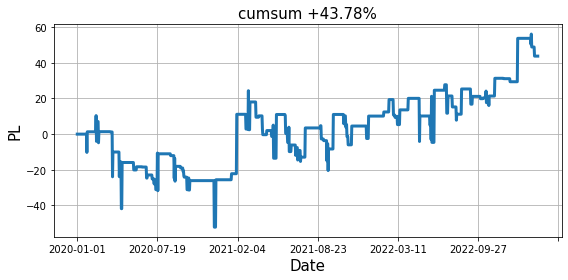

In [41]:
back_test(df_new, close_position_after=10)

In [43]:
#@title ブレイクアウト戦略
# 20日の移動平均線を計算する
ma_20 = df['close'].rolling(window=20).mean()

# 2σのボリンジャーバンドを計算する
std_20 = df['close'].rolling(window=20).std()
upper_band = ma_20 + 2 * std_20
lower_band = ma_20 - 2 * std_20

# 買いシグナルを生成する条件
buy_signal = df['close'] > upper_band.shift(1)

# 売りシグナルを生成する条件
sell_signal = df['close'] < lower_band.shift(1)

# 買いシグナルと売りシグナルをDataFrameに追加する
df['Buy_Signal'] = buy_signal
df['Sell_Signal'] = sell_signal

In [32]:
df_new = get_signal(df, col_long='Buy_Signal', col_short='Sell_Signal')

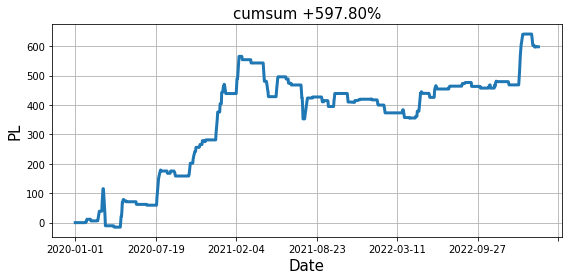

In [33]:
back_test(df_new, close_position_after=10)

In [44]:
#@title 三尊天井
# ローソク足チャートを作成するために日付を変換する
ohlc = df[['timestamp', 'open', 'high', 'low', 'close']]

# 三尊天井のパターン認識を行う
high1 = ohlc['high'].rolling(window=5).max().shift(1)
low1 = ohlc['low'].rolling(window=5).min().shift(1)
high2 = ohlc['high'].rolling(window=11).max().shift(1)
low2 = ohlc['low'].rolling(window=11).min().shift(1)
high3 = ohlc['high'].rolling(window=21).max().shift(1)
low3 = ohlc['low'].rolling(window=21).min().shift(1)
sell_signal = (ohlc['high'] >= high1) & (ohlc['high'] >= high2) & (ohlc['high'] >= high3)
buy_signal = (ohlc['low'] <= low1) & (ohlc['low'] <= low2) & (ohlc['low'] <= low3)

# 買いシグナルと売りシグナルをDataFrameに追加する
df['Buy_Signal'] = buy_signal
df['Sell_Signal'] = sell_signal

In [45]:
df_new = get_signal(df, col_long='Buy_Signal', col_short='Sell_Signal')


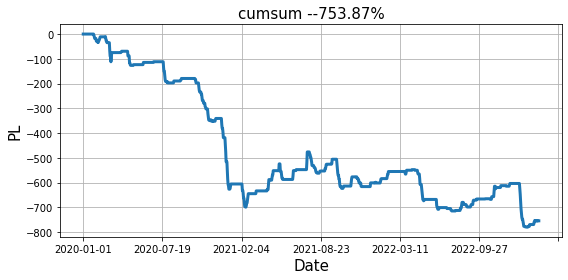

In [46]:
back_test(df_new, close_position_after=10)